#  Data Science - Exam Project

## The Medias Influence On The Stock Market

### *Hypothesis*:  INDSÆT VORES HYP HER
### *Null hypothesis*:   INDSÆT VORES NULL HYP HER

### Group Members
- Allan Simonsen cph-as484@cphbusiness.dk
- Jean-Poul Leth-Møller cph-jl360@cphbusiness.dk
- Nina Lisakowski cph-nl163@cphbusiness.dk


## 1. Environment Setup

In [631]:
# Pandas -used for structuring data
import pandas as pd

# numpy - Multi dimensional datastructure tool
import numpy as np

# Seaborn & matplotlib - used for plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from pandas.plotting import scatter_matrix

#Text vectorization import
import spacy

#For saving and loading the model
import joblib

#PCA for dimentionality reduction
from sklearn.decomposition import PCA

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial.distance import cdist

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## 2. Import and cleaning of data
This project contains 2 datasets.  
- **Ticker dataset**  
This dataset contains information about a specific stock. logging every day its opening price,closing price and volume.  
[Link to dataset](https://www.kaggle.com/datasets/paultimothymooney/stock-market-data)  

- **News media dataset**  
This dataset contains multiple thousands of headlines spaning over a decade. Row consist of headline, date of article and ticker(the stock that is related)
[Link to dataset](https://www.kaggle.com/datasets/miguelaenlle/massive-stock-news-analysis-db-for-nlpbacktests)

### 2.1 Ticker dataset

In [2]:
ticker_df = pd.read_csv('../data/stock_market_data/nasdaq/csv/NVDA.csv', delimiter=",")

In [3]:
ticker_df.head()

,Date,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


In [4]:
ticker_df.tail()

,Date,Low,Open,Volume,High,Close,Adjusted Close
5848,19-04-2022,213.139999,217.199997,51278100,223.729996,221.979996,221.979996
5849,20-04-2022,212.000000,225.169998,46897400,226.699997,214.820007,214.820007
5850,21-04-2022,200.000000,217.089996,65620900,223.919998,201.830002,201.830002
5851,22-04-2022,195.000000,203.029999,62356500,204.860001,195.149994,195.149994
5852,25-04-2022,190.960007,192.020004,53252181,198.460007,194.479996,194.479996


#### 2.1.1 describing dataset

In [5]:
ticker_df.shape

(5853, 7)

In [6]:
ticker_df.columns

Index(['Date', 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'], dtype='object')

In [7]:
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            5853 non-null   object 
 1   Low             5853 non-null   float64
 2   Open            5853 non-null   float64
 3   Volume          5853 non-null   int64  
 4   High            5853 non-null   float64
 5   Close           5853 non-null   float64
 6   Adjusted Close  5853 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 320.2+ KB


Checking for null values in data

In [8]:
ticker_df.isnull().sum()

Date              0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
dtype: int64

In [9]:
ticker_df.describe()

,Low,Open,Volume,High,Close,Adjusted Close
count,5853.000000,5853.000000,5.853000e+03,5853.000000,5853.000000,5853.000000
mean,24.494390,24.988110,6.172271e+07,25.435754,24.976619,24.740922
std,51.379501,52.551047,4.486185e+07,53.560622,52.482870,52.525937
min,0.333333,0.348958,1.968000e+06,0.355469,0.341146,0.313474
25%,2.502604,2.582500,3.382080e+07,2.667500,2.591146,2.380965
50%,3.931667,4.002500,5.160040e+07,4.075000,3.997500,3.715069
75%,11.800000,11.902500,7.566240e+07,11.982500,11.890000,11.699721
max,320.359985,335.170013,9.230856e+08,346.470001,333.760010,333.760010


#### 2.1.2 Initial Cleaning of dataset
Now we want to convert the Date object to be able to match values to this converted string and use it with pandas datetime ticker_df['Date']

In [10]:
values = pd.to_datetime(ticker_df['Date'].str[:], format="%d-%m-%Y", errors='coerce')
ticker_df.insert(1, 'date_time', values)
ticker_df.head()

,Date,date_time,Low,Open,Volume,High,Close,Adjusted Close
0,22-01-1999,1999-01-22,0.388021,0.437500,271468800,0.488281,0.410156,0.376886
1,25-01-1999,1999-01-25,0.410156,0.442708,51048000,0.458333,0.453125,0.416370
2,26-01-1999,1999-01-26,0.411458,0.458333,34320000,0.467448,0.417969,0.384065
3,27-01-1999,1999-01-27,0.395833,0.419271,24436800,0.429688,0.416667,0.382869
4,28-01-1999,1999-01-28,0.412760,0.416667,22752000,0.419271,0.415365,0.381673


In [11]:
sorted_ticker_df = ticker_df[~(ticker_df['date_time'] < '2010-08-01')]
sorted_ticker_df = sorted_ticker_df.sort_values(by = 'date_time')
sorted_ticker_df.reset_index(drop=True, inplace=True)
sorted_ticker_df

,Date,date_time,Low,Open,Volume,High,Close,Adjusted Close
0,02-08-2010,2010-08-02,2.285000,2.337500,91702000,2.347500,2.295000,2.108841
1,03-08-2010,2010-08-03,2.217500,2.277500,95544400,2.280000,2.235000,2.053708
2,04-08-2010,2010-08-04,2.245000,2.255000,85549600,2.337500,2.330000,2.141003
3,05-08-2010,2010-08-05,2.295000,2.337500,80050400,2.365000,2.360000,2.168569
4,06-08-2010,2010-08-06,2.330000,2.350000,73990400,2.412500,2.387500,2.193838
...,...,...,...,...,...,...,...,...
2949,19-04-2022,2022-04-19,213.139999,217.199997,51278100,223.729996,221.979996,221.979996
2950,20-04-2022,2022-04-20,212.000000,225.169998,46897400,226.699997,214.820007,214.820007
2951,21-04-2022,2022-04-21,200.000000,217.089996,65620900,223.919998,201.830002,201.830002
2952,22-04-2022,2022-04-22,195.000000,203.029999,62356500,204.860001,195.149994,195.149994


#### 2.1.3 Exploring and visualizing the data
Now let us explore and play with the dataset to gain insights after we have cleaned the data  
To start of with let us see if we can find any correlation in the dataset

##### 2.1.3.1 Correlation & Heatmap

In [12]:
corr_matrix = sorted_ticker_df.corr()
corr_matrix

,Low,Open,Volume,High,Close,Adjusted Close
Low,1.000000,0.999718,-0.070327,0.999663,0.999735,0.999733
Open,0.999718,1.000000,-0.066840,0.999749,0.999383,0.999382
Volume,-0.070327,-0.066840,1.000000,-0.063342,-0.066756,-0.067281
High,0.999663,0.999749,-0.063342,1.000000,0.999707,0.999706
Close,0.999735,0.999383,-0.066756,0.999707,1.000000,0.999999
Adjusted Close,0.999733,0.999382,-0.067281,0.999706,0.999999,1.000000


In [13]:
# Looking for correlations from our corr_matrix
corr_matrix["Close"].sort_values(ascending=False)

Close             1.000000
Adjusted Close    0.999999
Low               0.999735
High              0.999707
Open              0.999383
Volume           -0.066756
Name: Close, dtype: float64

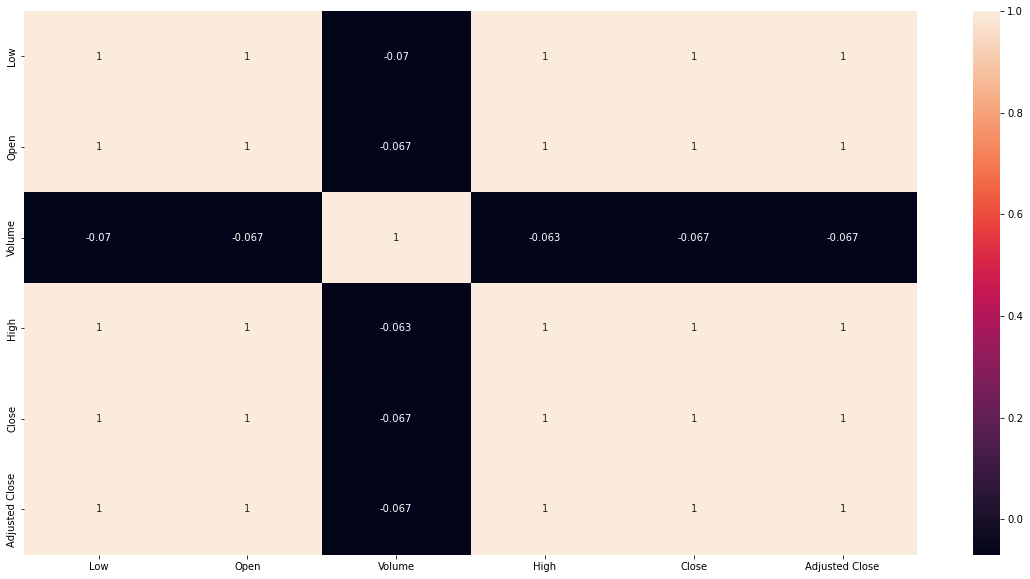

In [14]:
# Now let us visualize our matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

##### 2.1.3.2 Pairplots

array([[<AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Low'>],
       [<AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Open'>],
       [<AxesSubplot:xlabel='Low', ylabel='Volume'>,
        <AxesSubplot:xlabel='Open', ylabel='Volume'>,
        <AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='High', ylabel='Volume'>,
        <AxesSubplot:xlabel='Close', ylabel='Volume'>,
        <AxesSubplot:xlabel='Adjusted Close', ylabel='Volume'>],
       [<AxesSubplo

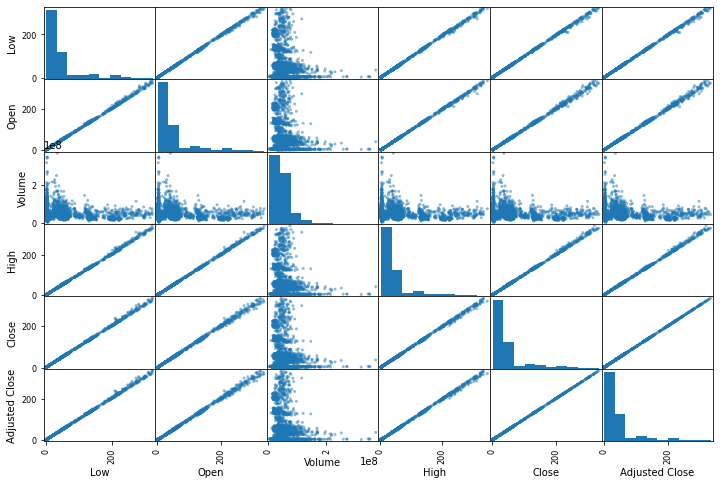

In [15]:
attributes = ['Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close']
scatter_matrix(sorted_ticker_df[attributes], figsize=(12, 8))

We then visualize this further by making a pairplot

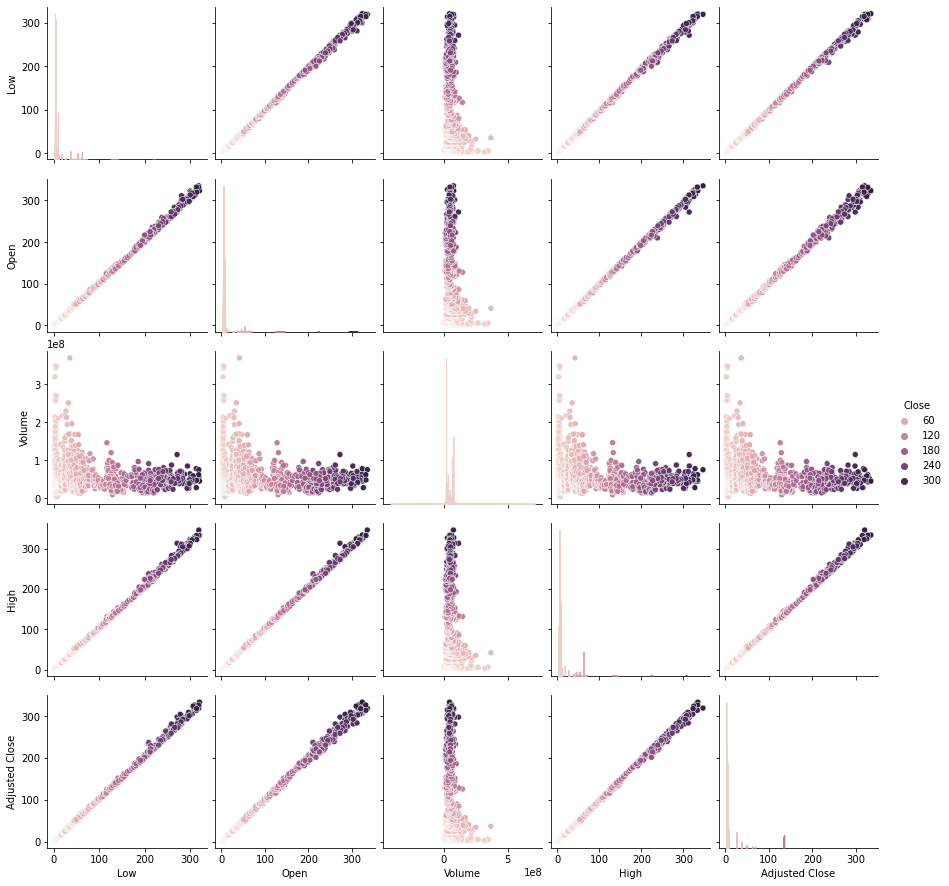

In [16]:
sns.pairplot(sorted_ticker_df, hue='Close')
plt.show()

ticker_df : 'Low', 'Open', 'Volume', 'High', 'Close', 'Adjusted Close'  
Visualizing all the features by using scatterplots

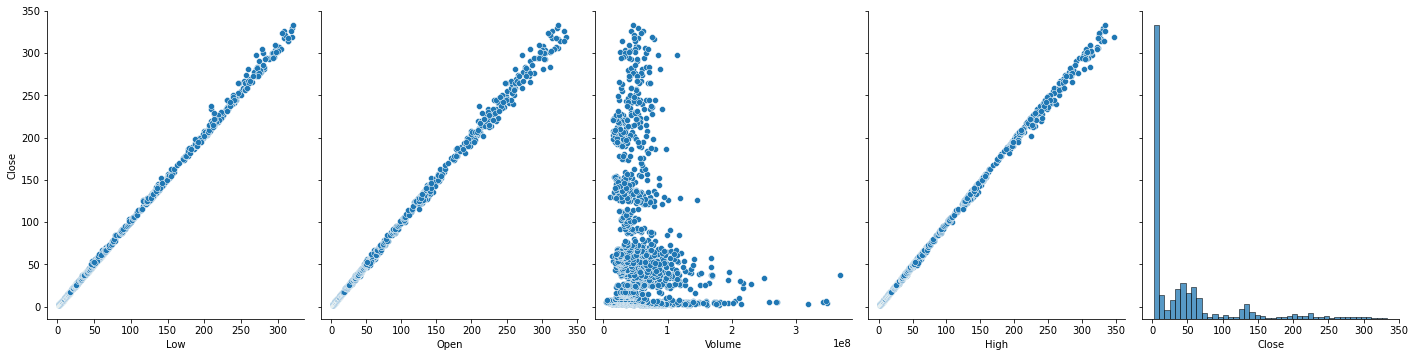

In [17]:
sns.pairplot(sorted_ticker_df, x_vars=['Low', 'Open', 'Volume', 'High', 'Close'], y_vars='Close', height=5, aspect=0.8)

##### 2.1.3.3 Histograms and boxplots

array([[<AxesSubplot:title={'center':'date_time'}>,
        <AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Open'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adjusted Close'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

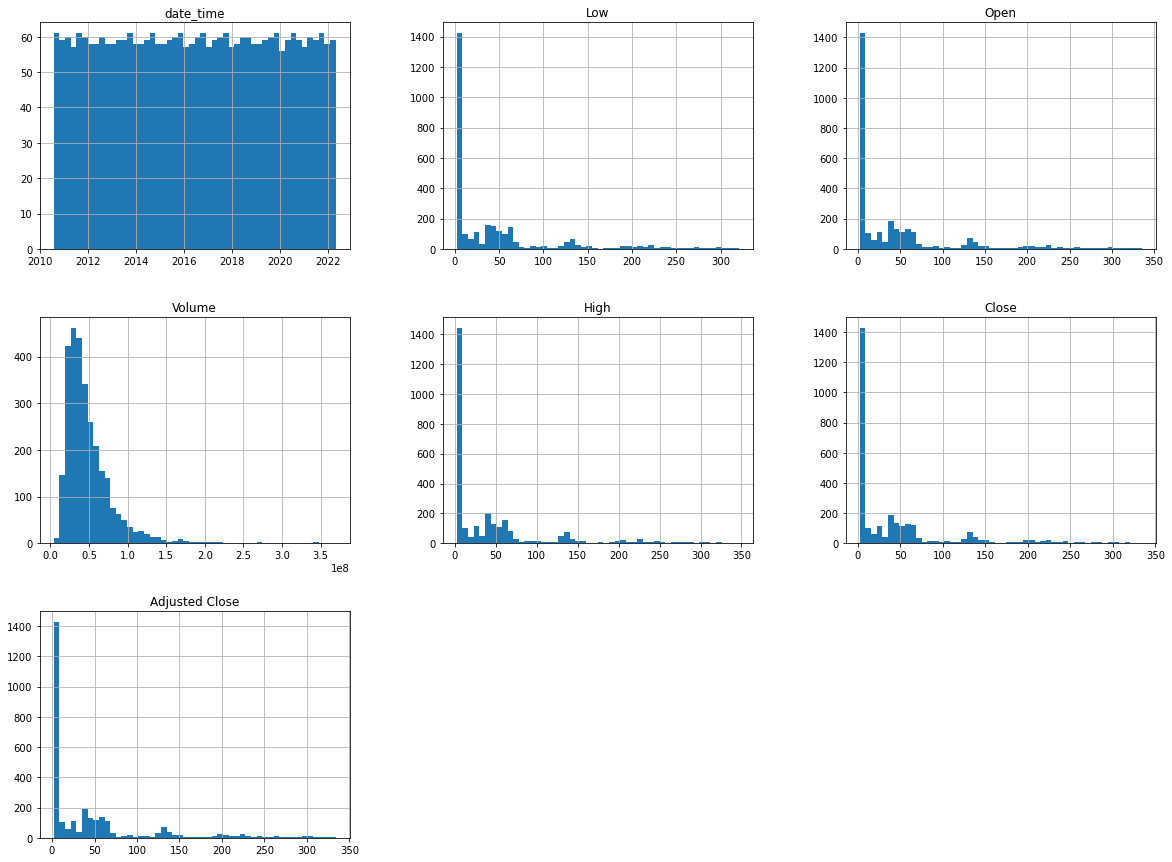

In [18]:
sorted_ticker_df.hist(bins=50, figsize=(20, 15))

By looking at the plots we can see that Low, Open and high seem to have a linear correlation with the closing price.  
Let us search for outliers and see how the data is distributed

<AxesSubplot:xlabel='Volume', ylabel='Close'>

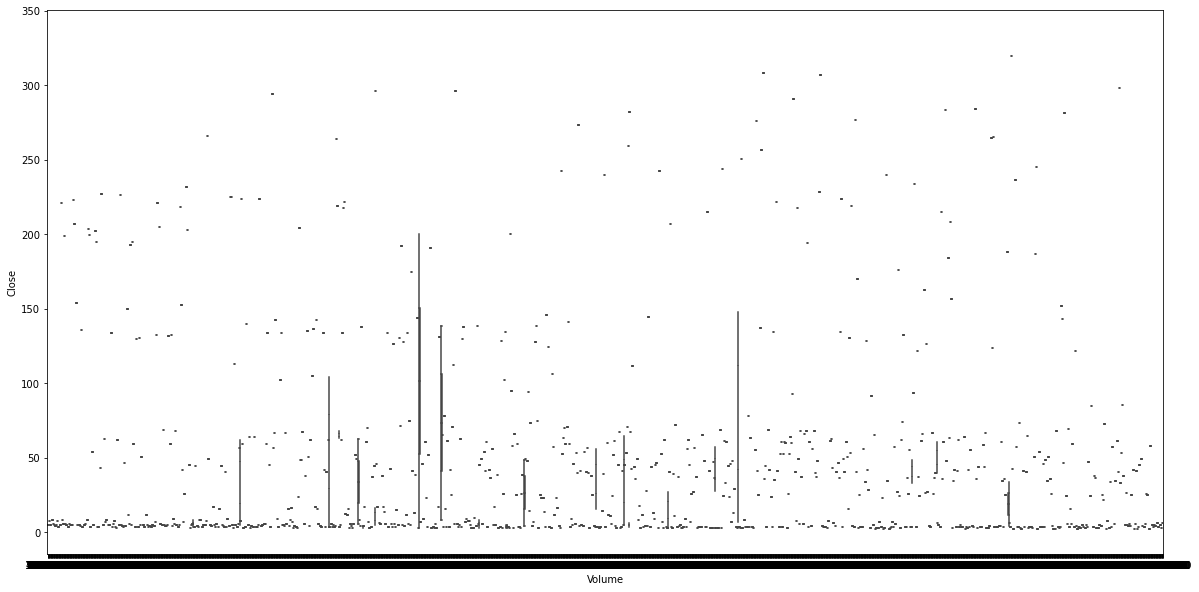

In [19]:
sns.boxplot(x="Volume", y="Close", data=sorted_ticker_df)

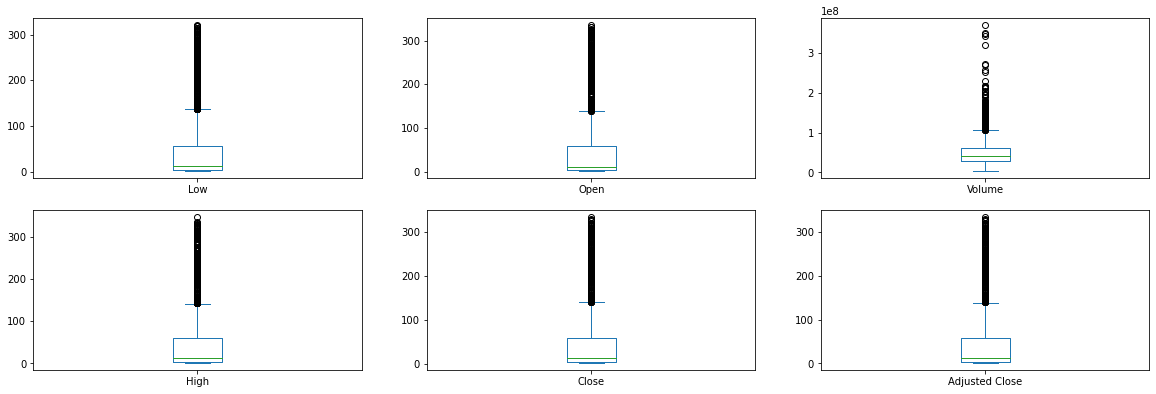

In [20]:
# Draw box-whisker plots
sorted_ticker_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

##### 2.1.3.4 Exploring Volume and close columns

We are trying to analyze whether news has an effect on price and volume.  
Therefor our focus will be on exploring price and volume further


array([[<AxesSubplot:xlabel='Volume', ylabel='Volume'>,
        <AxesSubplot:xlabel='Close', ylabel='Volume'>],
       [<AxesSubplot:xlabel='Volume', ylabel='Close'>,
        <AxesSubplot:xlabel='Close', ylabel='Close'>]], dtype=object)

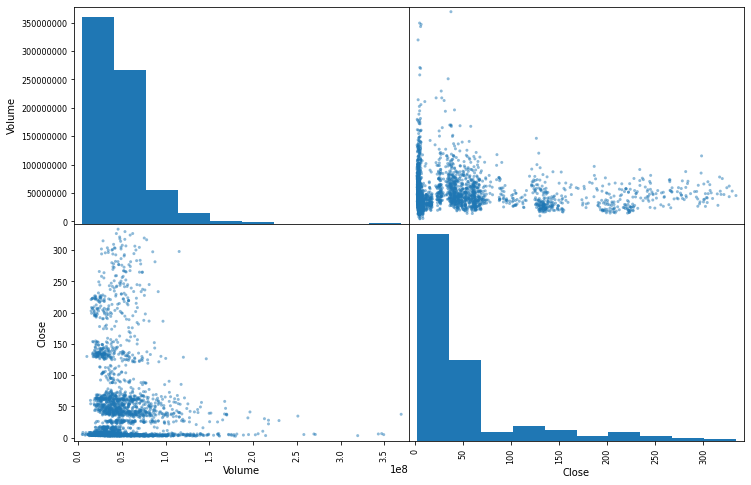

In [21]:
attributes = ['Volume', 'Close']
scatter_matrix(sorted_ticker_df[attributes], figsize=(12, 8))

<AxesSubplot:ylabel='Volume'>

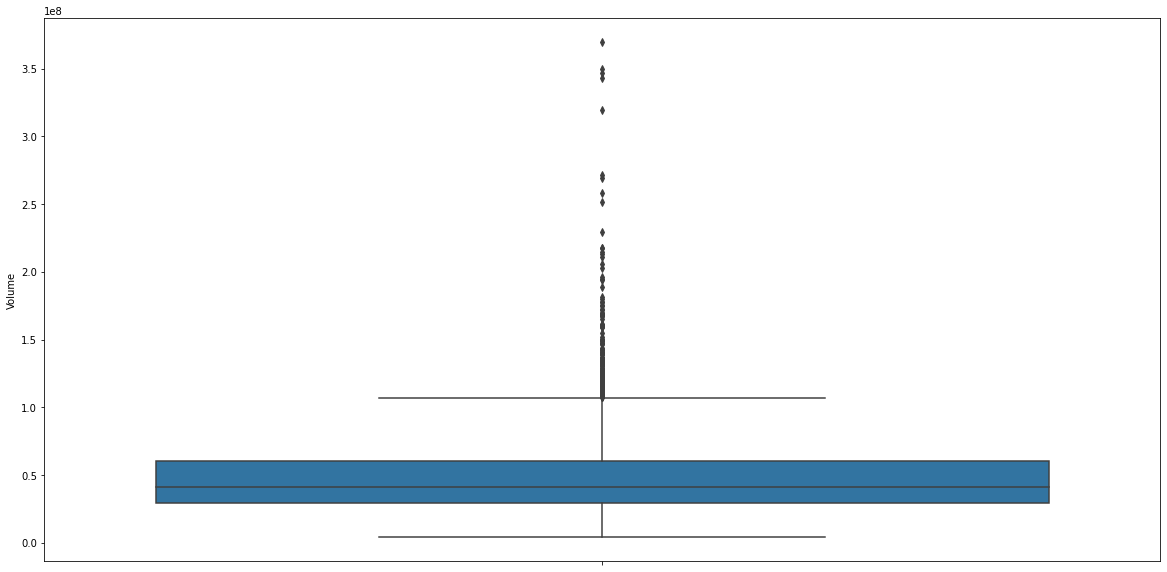

In [22]:
sns.boxplot(y=sorted_ticker_df["Volume"])

<AxesSubplot:xlabel='Volume', ylabel='Count'>

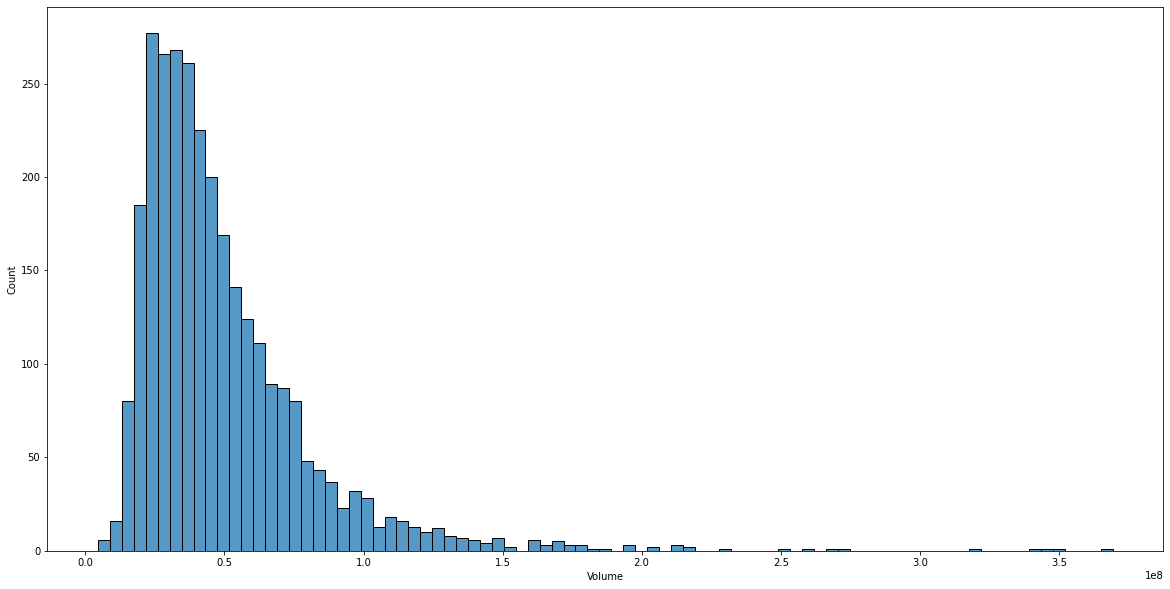

In [23]:
sns.histplot(sorted_ticker_df['Volume'],  label='Volume')  
#sns.distplot(ticker_df['Volume'],  label='Volume', norm_hist=True)  

<AxesSubplot:ylabel='Close'>

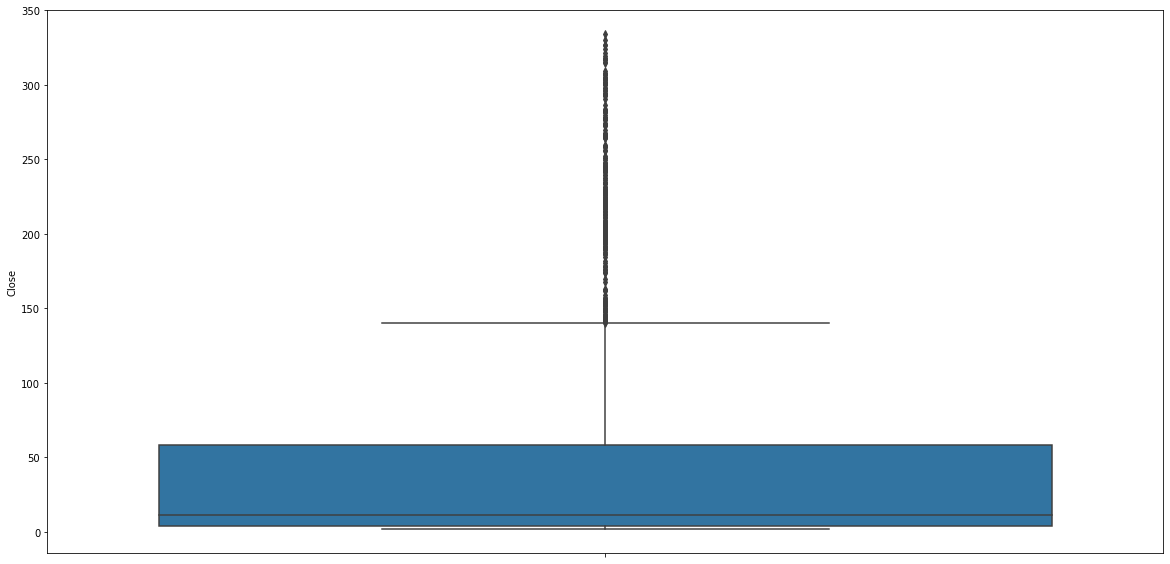

In [24]:
sns.boxplot(y=sorted_ticker_df["Close"])

<AxesSubplot:xlabel='Close', ylabel='Count'>

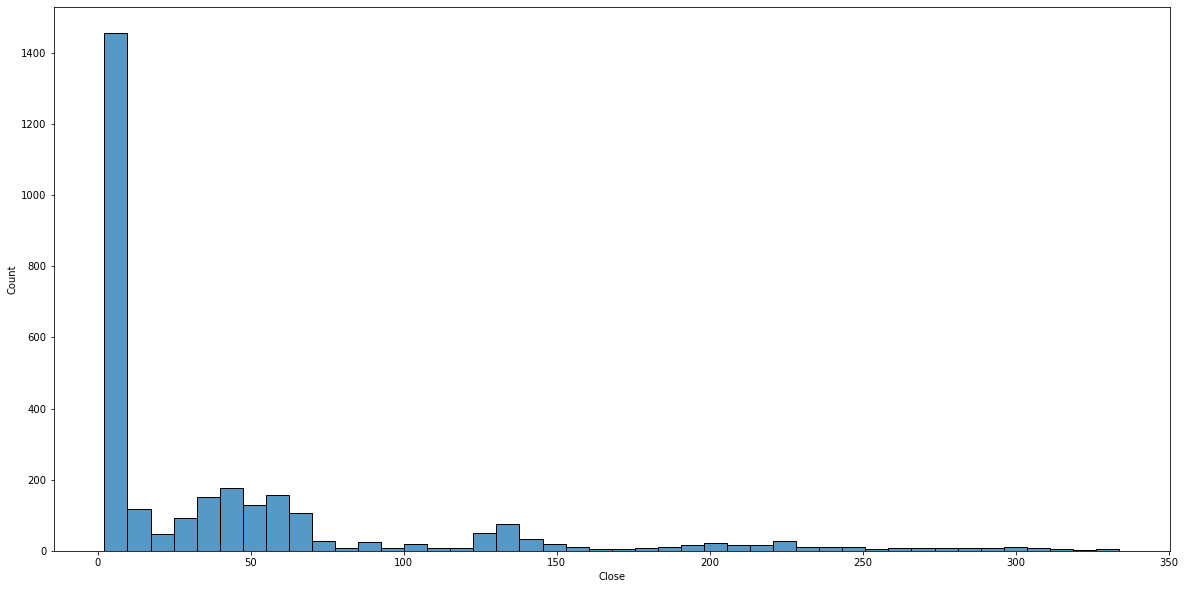

In [25]:
sns.histplot(sorted_ticker_df['Close'],  label='Close')  
#sns.distplot(ticker_df['Close'],  label='Close', norm_hist=True)  

Let us get a full picture of all the moves the stock has done over time by looking at the closing price


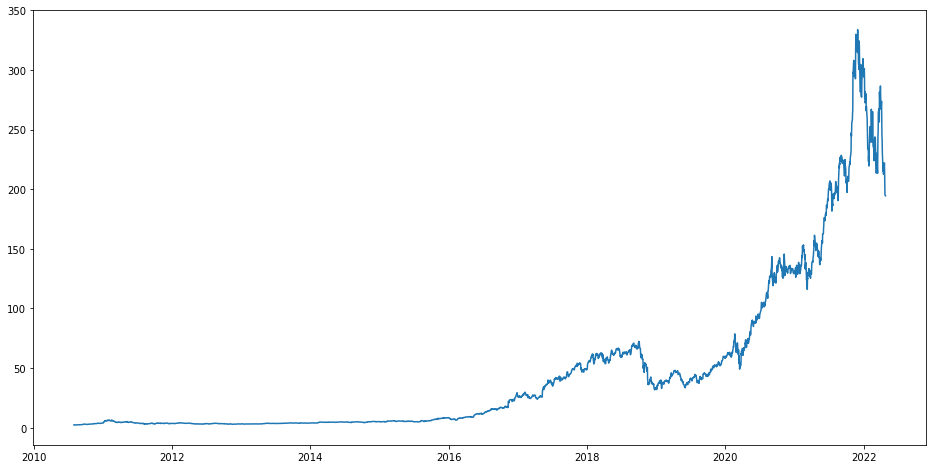

In [26]:
sorted_dateindex_ticker_df=sorted_ticker_df
sorted_dateindex_ticker_df.index=sorted_ticker_df['date_time']

plt.figure(figsize=(16, 8))
plt.plot(sorted_dateindex_ticker_df["Close"], label='Close Price history')

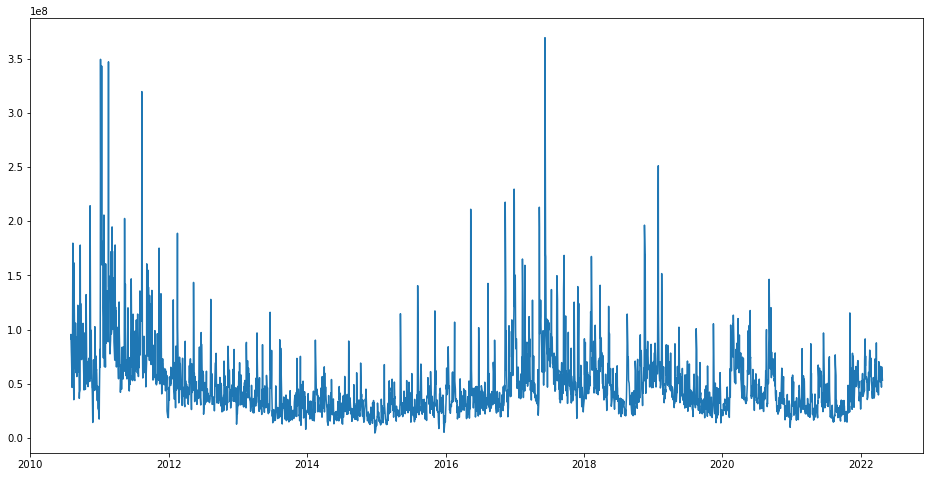

In [27]:
plt.figure(figsize=(16, 8))
plt.plot(sorted_dateindex_ticker_df["Volume"], label='Volume history')

##### 2.1.3.5 Exploring Volume and close columns
We then zoom in to look at the last three months to potentially find the current trend


<AxesSubplot:xlabel='date_time'>

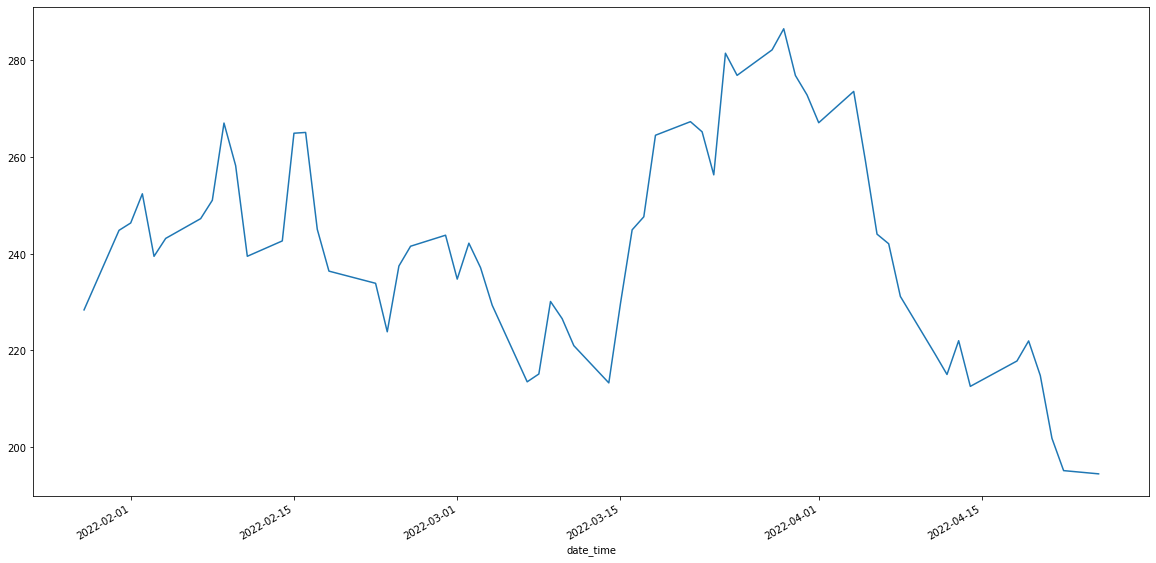

In [28]:
three_months_open = sorted_dateindex_ticker_df.iloc[-60:]
three_months_open['Close'].plot()

Viewing open vs close

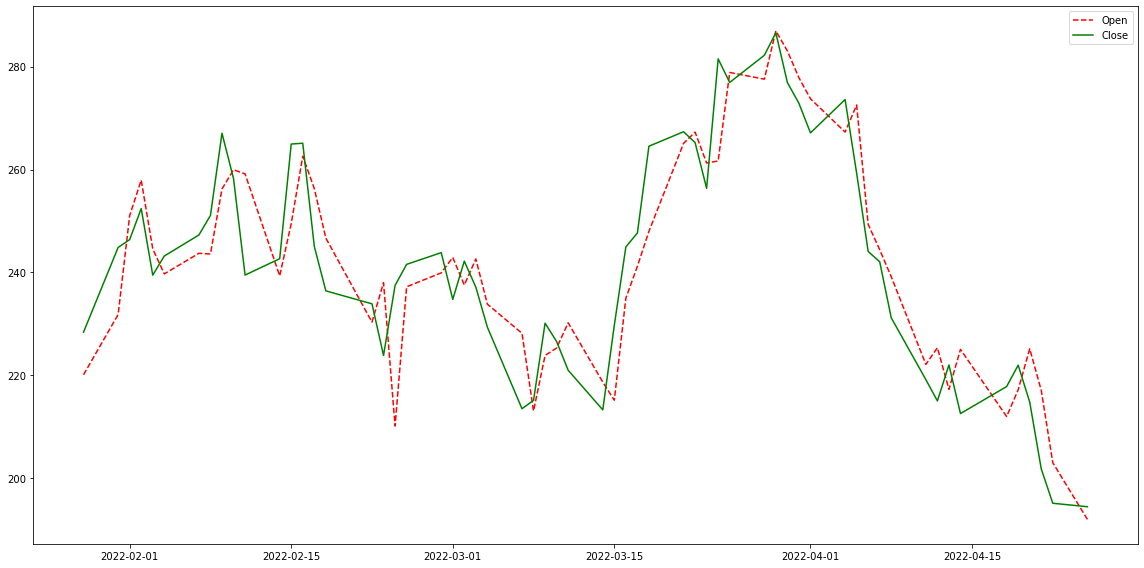

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(three_months_open.index, three_months_open['Open'], '--', color='r', label='Open')
ax.plot(three_months_open.index, three_months_open['Close'], '-', color='g', label='Close')
ax.legend()
fig.tight_layout()
plt.show()

Looking for outliers in the closing price the past three months

<AxesSubplot:>

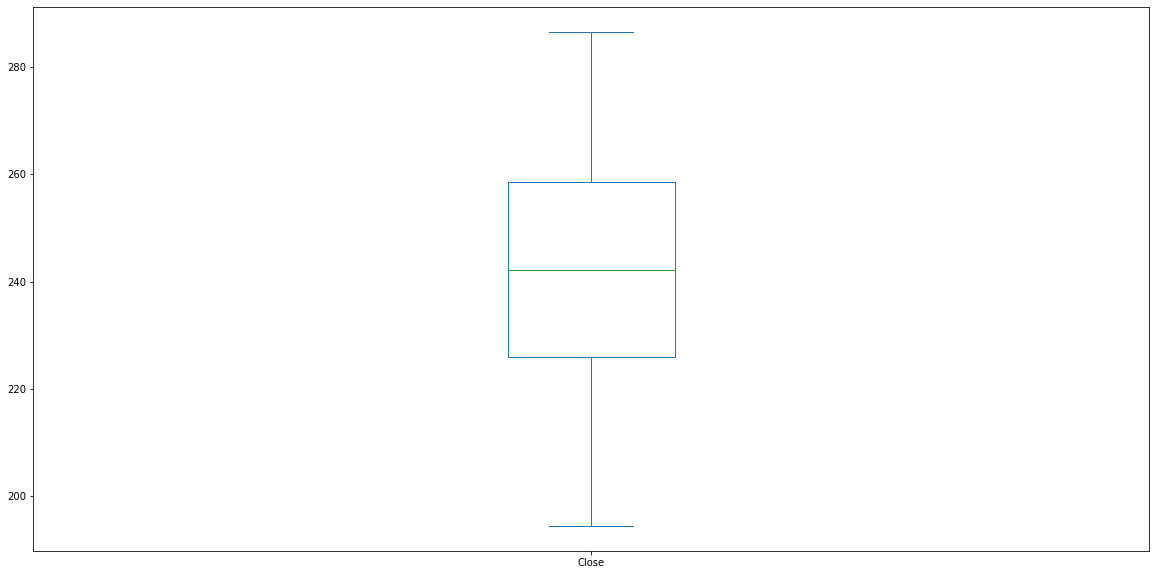

In [30]:
three_months_open['Close'].plot(kind='box')

Looking at the volume the past three months

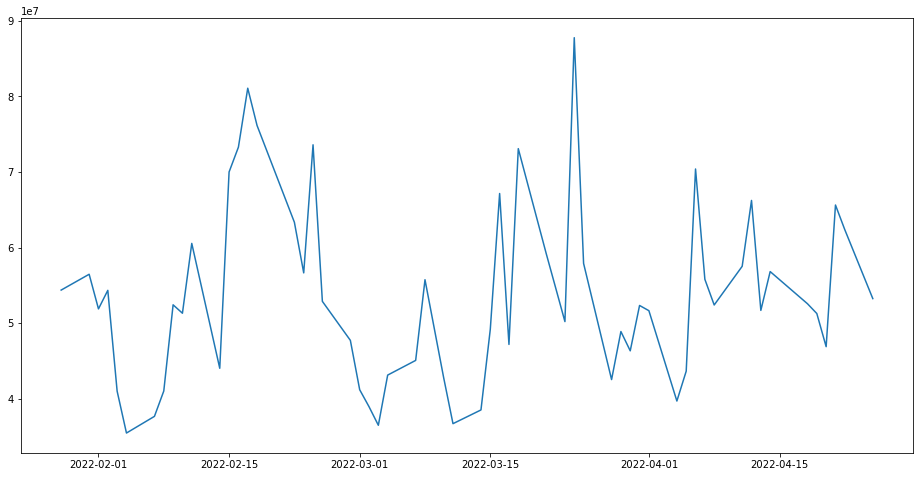

In [31]:
plt.figure(figsize=(16, 8))
plt.plot(three_months_open["Volume"], label='Volume history')

<AxesSubplot:>

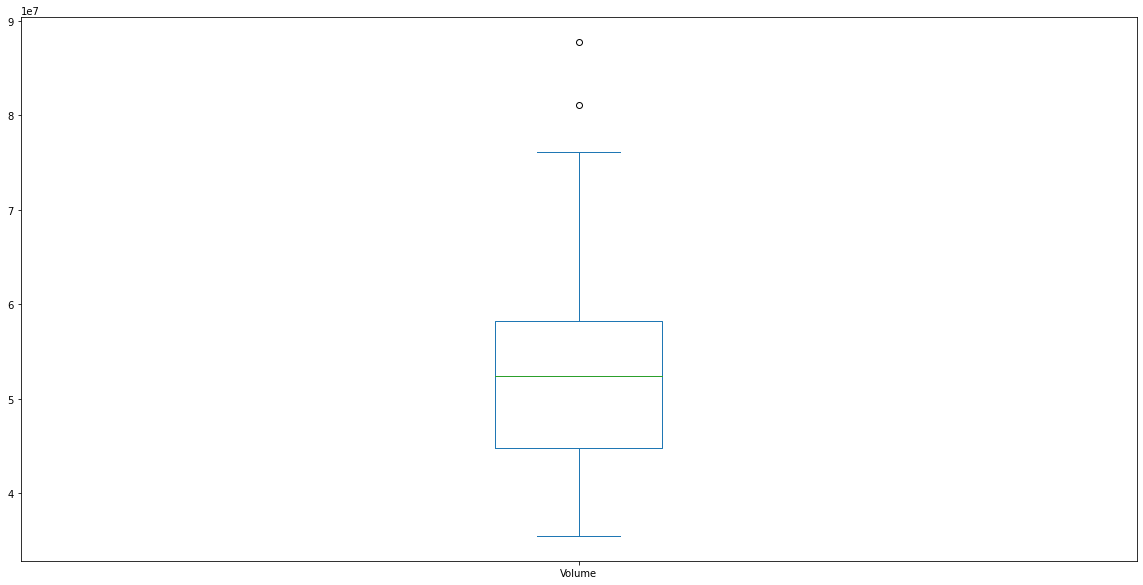

In [32]:
three_months_open['Volume'].plot(kind='box')

Looking for a relationship between closing price and volume over the past three months


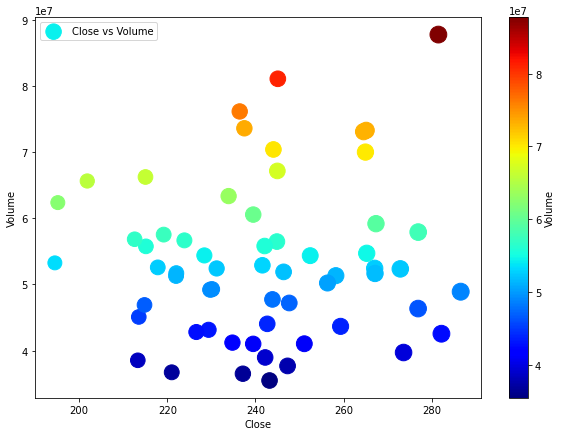

In [33]:
three_months_open.plot(kind="scatter", x="Close", y="Volume", alpha=1,
    s=three_months_open["Close"], label="Close vs Volume", figsize=(10,7),
    c="Volume", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#### 2.1.4 Preperation for machine learning
We want to add a column to be able to see if our stock of interest has gone up or down on the given day.  
First we convert this boolean values.

In [34]:
sorted_ticker_df.reset_index(drop=True, inplace=True)
sorted_ticker_df['Gain or Loss'] = sorted_ticker_df['Close'] > sorted_ticker_df['Open']
print(sorted_ticker_df.shape)
sorted_ticker_df.head()

(2954, 9)


,Date,date_time,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
0,02-08-2010,2010-08-02,2.2850,2.3375,91702000,2.3475,2.2950,2.108841,False
1,03-08-2010,2010-08-03,2.2175,2.2775,95544400,2.2800,2.2350,2.053708,False
2,04-08-2010,2010-08-04,2.2450,2.2550,85549600,2.3375,2.3300,2.141003,True
3,05-08-2010,2010-08-05,2.2950,2.3375,80050400,2.3650,2.3600,2.168569,True
4,06-08-2010,2010-08-06,2.3300,2.3500,73990400,2.4125,2.3875,2.193838,True


Hereafter we convert this to binary values in form of 1 or 0 to be able to use this when training our model


In [35]:
sorted_ticker_df['Gain or Loss'] = sorted_ticker_df['Gain or Loss'].astype(int)

sorted_ticker_df.head()

,Date,date_time,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
0,02-08-2010,2010-08-02,2.2850,2.3375,91702000,2.3475,2.2950,2.108841,0
1,03-08-2010,2010-08-03,2.2175,2.2775,95544400,2.2800,2.2350,2.053708,0
2,04-08-2010,2010-08-04,2.2450,2.2550,85549600,2.3375,2.3300,2.141003,1
3,05-08-2010,2010-08-05,2.2950,2.3375,80050400,2.3650,2.3600,2.168569,1
4,06-08-2010,2010-08-06,2.3300,2.3500,73990400,2.4125,2.3875,2.193838,1


We will now investigate which categories the target column contains

In [36]:
sorted_ticker_df['Gain or Loss'].value_counts()

1    1486
0    1468
Name: Gain or Loss, dtype: int64

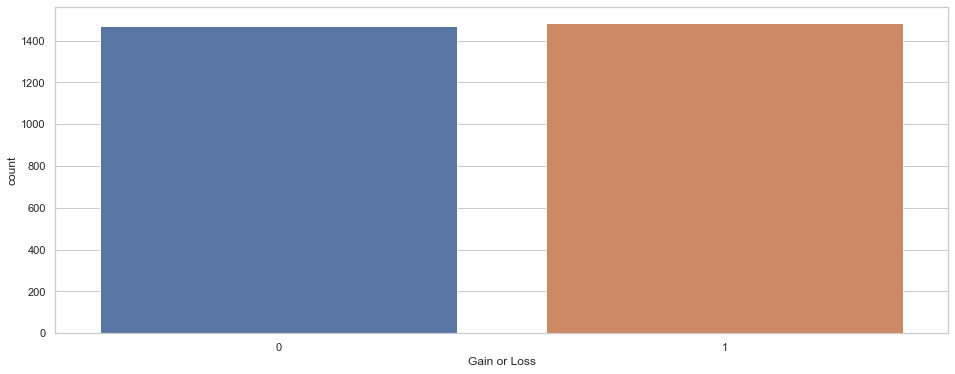

In [37]:
plt.figure(figsize=(16, 6))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x='Gain or Loss', data=sorted_ticker_df)

<AxesSubplot:xlabel='Gain or Loss', ylabel='Volume'>

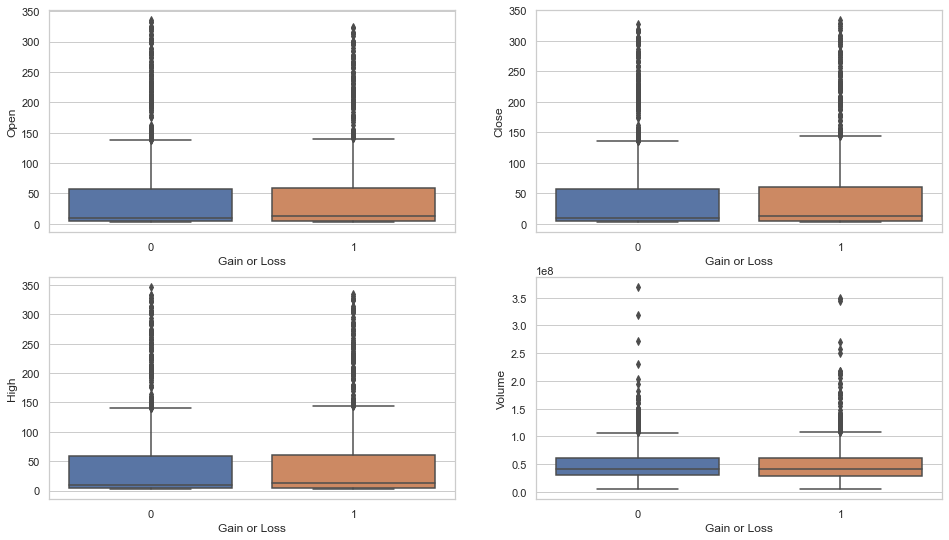

In [38]:
fig, axes = plt.subplots(2,2, figsize=(16,9))

sns.boxplot(x='Gain or Loss', y='Open', data=sorted_ticker_df, orient='v', ax=axes[0,0])
sns.boxplot(x='Gain or Loss', y='Close', data=sorted_ticker_df, orient='v', ax=axes[0,1])
sns.boxplot(x='Gain or Loss', y='High', data=sorted_ticker_df, orient='v', ax=axes[1,0])
sns.boxplot(x='Gain or Loss', y='Volume', data=sorted_ticker_df, orient='v', ax=axes[1,1])

### 2.2 News dataset

In [39]:
news_df = pd.read_csv('../data/news/analyst_ratings_processed.csv', delimiter=",")

In [40]:
news_df.head()

,Unnamed: 0,title,date,stock
0,0.0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,1.0,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,2.0,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,3.0,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,4.0,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


In [41]:
news_df.tail()

,Unnamed: 0,title,date,stock
1400464,1413844.0,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,ZX
1400465,1413845.0,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,ZX
1400466,1413846.0,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,ZX
1400467,1413847.0,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,ZX
1400468,1413848.0,China Zenix Auto International Opens For Tradi...,2011-05-12 09:36:00-04:00,ZX


#### 2.2.1 describing dataset

In [42]:
news_df.shape

(1400469, 4)

In [43]:
news_df.columns

Index(['Unnamed: 0', 'title', 'date', 'stock'], dtype='object')

In [44]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400469 entries, 0 to 1400468
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1399180 non-null  float64
 1   title       1400469 non-null  object 
 2   date        1399180 non-null  object 
 3   stock       1397891 non-null  object 
dtypes: float64(1), object(3)
memory usage: 42.7+ MB


In [45]:
news_df.isnull().sum()

Unnamed: 0    1289
title            0
date          1289
stock         2578
dtype: int64

#### 2.2.2 Initial Cleaning of dataset
Our todo list for cleaning is as following:
1. Remove the unnamed column, as this column represent some kind of index, however since there are null values, its pretty useless
2. Remove rows that contain any kind of null value. Since we have 1m+ data rows we wont worry about a few thousands being dropped. since there is no value in using any average tool or other techniques to fill out these rows.
3. Converting dates into pandas datatime objects in a new column called date_time

Removing Unnamed column (index)

In [46]:
news_df = news_df.iloc[:,1:]
news_df.head()

,title,date,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,A


Removing rows that contain null values

In [47]:
news_df.dropna(inplace=True)
news_df.isnull().sum()

title    0
date     0
stock    0
dtype: int64

Converting date into pandas datetime and putting into date_time column

In [48]:
news_df.insert(2, 'date_time', pd.to_datetime(news_df['date'].str[:19], format="%Y-%m-%d", errors='coerce').dt.date)
news_df['date_time'] = pd.to_datetime(news_df['date_time'])


In [49]:
news_df['date_time']

0         2020-06-05
1         2020-06-03
2         2020-05-26
3         2020-05-22
4         2020-05-22
             ...    
1400464   2011-08-29
1400465   2011-06-22
1400466   2011-06-21
1400467   2011-06-21
1400468   2011-05-12
Name: date_time, Length: 1397891, dtype: datetime64[ns]

In [50]:
news_df

,title,date,date_time,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,2020-06-03,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,2020-05-22,A
...,...,...,...,...
1400464,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,2011-08-29,ZX
1400465,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,2011-06-22,ZX
1400466,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,2011-06-21,ZX
1400467,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,2011-06-21,ZX


#### 2.2.3 Exploring and visualizing the data

##### 2.2.3.1 Date Column
We want to investigate the date column to see when our news data exist

In [51]:
news_df

,title,date,date_time,stock
0,Stocks That Hit 52-Week Highs On Friday,2020-06-05 10:30:00-04:00,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,2020-06-03 10:45:00-04:00,2020-06-03,A
2,71 Biggest Movers From Friday,2020-05-26 04:30:00-04:00,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,2020-05-22 12:45:00-04:00,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,2020-05-22 11:38:00-04:00,2020-05-22,A
...,...,...,...,...
1400464,Top Narrow Based Indexes For August 29,2011-08-29 10:41:00-04:00,2011-08-29,ZX
1400465,Recap: Wednesday's Top Percentage Gainers and ...,2011-06-22 16:44:00-04:00,2011-06-22,ZX
1400466,UPDATE: Oppenheimer Color on China Zenix Auto ...,2011-06-21 08:26:00-04:00,2011-06-21,ZX
1400467,Oppenheimer Initiates China Zenix At Outperfor...,2011-06-21 05:59:00-04:00,2011-06-21,ZX


In [52]:
sorted_news_df = news_df.sort_values(by = 'date_time')
sorted_news_df['combined'] = sorted_news_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
sorted_news_df['combined'].unique()

array(['02-2009', '04-2009', '05-2009', '06-2009', '07-2009', '08-2009',
       '09-2009', '10-2009', '11-2009', '12-2009', '01-2010', '02-2010',
       '03-2010', '04-2010', '05-2010', '06-2010', '07-2010', '08-2010',
       '09-2010', '10-2010', '11-2010', '12-2010', '01-2011', '02-2011',
       '03-2011', '04-2011', '05-2011', '06-2011', '07-2011', '08-2011',
       '09-2011', '10-2011', '11-2011', '12-2011', '01-2012', '02-2012',
       '03-2012', '04-2012', '05-2012', '06-2012', '07-2012', '08-2012',
       '09-2012', '10-2012', '11-2012', '12-2012', '01-2013', '02-2013',
       '03-2013', '04-2013', '05-2013', '06-2013', '07-2013', '08-2013',
       '09-2013', '10-2013', '11-2013', '12-2013', '01-2014', '02-2014',
       '03-2014', '04-2014', '05-2014', '06-2014', '07-2014', '08-2014',
       '09-2014', '10-2014', '11-2014', '12-2014', '01-2015', '02-2015',
       '03-2015', '04-2015', '05-2015', '06-2015', '07-2015', '08-2015',
       '09-2015', '10-2015', '11-2015', '12-2015', 

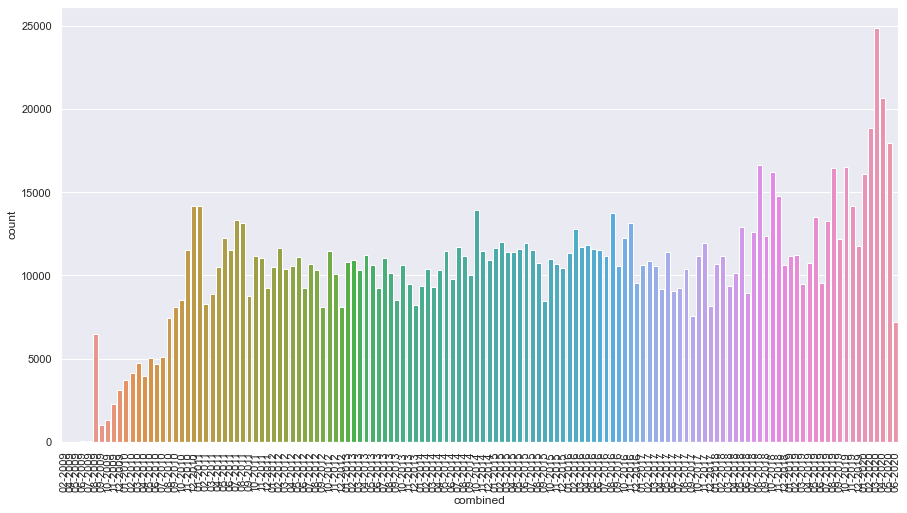

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=sorted_news_df)
chart.tick_params(axis = 'x', rotation = 90)

We can see that there are very few news stories from before 08-2020. therefore we will remove this data, this account for around 45k rows.

In [54]:
news_df = news_df[~(news_df['date_time'] < '2010-08-01')]

In [55]:
sorted_news_df = news_df.sort_values(by = 'date_time')
sorted_news_df['combined'] = sorted_news_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
sorted_news_df['combined'].unique()

array(['08-2010', '09-2010', '10-2010', '11-2010', '12-2010', '01-2011',
       '02-2011', '03-2011', '04-2011', '05-2011', '06-2011', '07-2011',
       '08-2011', '09-2011', '10-2011', '11-2011', '12-2011', '01-2012',
       '02-2012', '03-2012', '04-2012', '05-2012', '06-2012', '07-2012',
       '08-2012', '09-2012', '10-2012', '11-2012', '12-2012', '01-2013',
       '02-2013', '03-2013', '04-2013', '05-2013', '06-2013', '07-2013',
       '08-2013', '09-2013', '10-2013', '11-2013', '12-2013', '01-2014',
       '02-2014', '03-2014', '04-2014', '05-2014', '06-2014', '07-2014',
       '08-2014', '09-2014', '10-2014', '11-2014', '12-2014', '01-2015',
       '02-2015', '03-2015', '04-2015', '05-2015', '06-2015', '07-2015',
       '08-2015', '09-2015', '10-2015', '11-2015', '12-2015', '01-2016',
       '02-2016', '03-2016', '04-2016', '05-2016', '06-2016', '07-2016',
       '08-2016', '09-2016', '10-2016', '11-2016', '12-2016', '01-2017',
       '02-2017', '03-2017', '04-2017', '05-2017', 

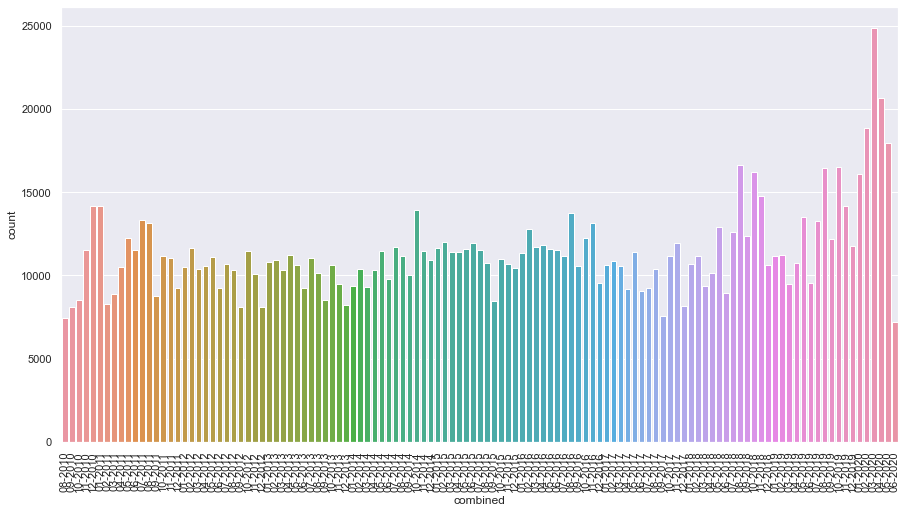

In [56]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=sorted_news_df)
chart.tick_params(axis = 'x', rotation = 90)

#### 2.2.3.2 Stock Column

We want to investigate how many news stories that are related to each stock

In [57]:
df = news_df["stock"].value_counts()
df.head()

MRK     3179
MU      3144
NVDA    3133
QQQ     3100
EBAY    3021
Name: stock, dtype: int64

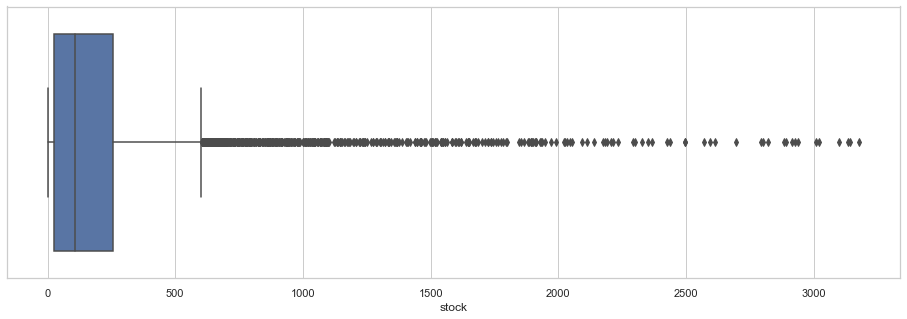

In [58]:
sns.set(rc = {'figure.figsize':(16,5)})
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df)

In [59]:
most_interesting_stocks = df[~(df.iloc[:] <= 2000)]  

In [60]:
most_interesting_stocks.shape

(41,)

In [61]:
most_interesting_stocks.head(41)

MRK     3179
MU      3144
NVDA    3133
QQQ     3100
EBAY    3021
NFLX    3009
VZ      2937
JNJ     2927
QCOM    2915
MS      2892
GILD    2882
BABA    2820
M       2801
DAL     2794
ORCL    2695
WFC     2612
KO      2595
BBRY    2570
JCP     2498
FDX     2495
BMY     2437
HD      2424
CMG     2365
AGN     2353
LLY     2328
CAT     2299
GPRO    2292
FSLR    2232
P       2216
MCD     2208
LMT     2189
CHK     2184
TWX     2175
EWU     2141
XLF     2113
GRPN    2093
EA      2053
NOK     2046
GLD     2034
EWP     2027
GPS     2024
Name: stock, dtype: int64

##### 2.2.3.3
We are going to isolate and look at the NVDA stock. therefore we would like to visualize any trends and see the distribution of stories.

In [62]:
sorted_news_df['combined'] = sorted_news_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
nvda_df = sorted_news_df.loc[sorted_news_df['stock'] == 'NVDA']
nvda_df.reset_index(drop=True, inplace=True)

nvda_df

,title,date,date_time,stock,combined
0,Nvidia Goes Negative (NVDA),2011-03-03 10:06:00-05:00,2011-03-03,NVDA,03-2011
1,Goldman Sachs Gives Color On Semiconductors (N...,2011-03-07 08:23:00-05:00,2011-03-07,NVDA,03-2011
2,Auriga Still Not Sure Where Reality Lies For N...,2011-03-07 07:47:00-05:00,2011-03-07,NVDA,03-2011
3,"JPM Says ""Our Bearish View on the Company's Ex...",2011-03-08 09:53:00-05:00,2011-03-08,NVDA,03-2011
4,"Benzinga's Top Upgrades (NVDA, ANF, MIPS, WFT)",2011-03-08 08:23:00-05:00,2011-03-08,NVDA,03-2011
...,...,...,...,...,...
3128,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,2020-06-08,NVDA,06-2020
3129,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,2020-06-09,NVDA,06-2020
3130,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,2020-06-10,NVDA,06-2020
3131,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,2020-06-10,NVDA,06-2020


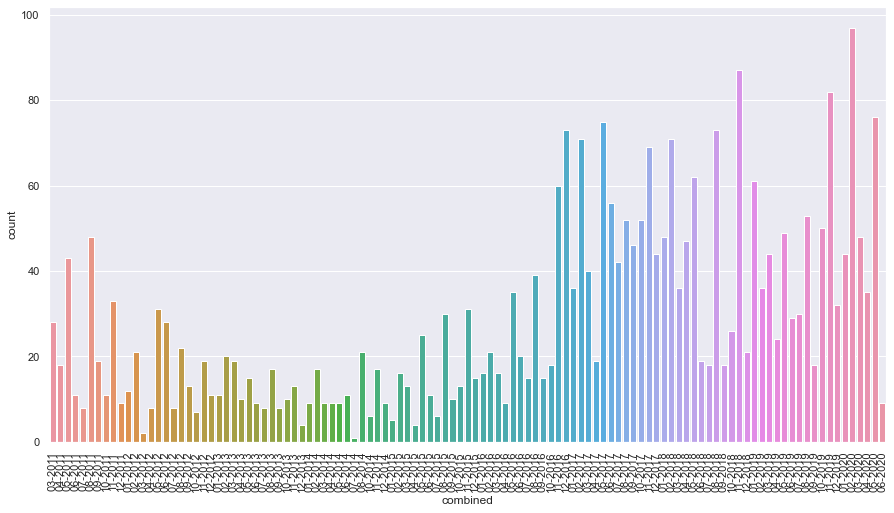

In [63]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=nvda_df)
chart.tick_params(axis = 'x', rotation = 90)

We see that there is a higher concentration in the latter years. however we would like to see how the data looks on a day to day basis. So we are going to isolate the last three years.

In [64]:
nvda_df = nvda_df[~(nvda_df['date_time'] < '2019-12-01')]

In [65]:
nvda_df['combined'] = nvda_df['date_time'].dt.day.astype(str).str.zfill(2) + '-' +nvda_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]
nvda_df

C:\Users\allan\AppData\Local\Temp/ipykernel_12360/1121681779.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_df['combined'] = nvda_df['date_time'].dt.day.astype(str).str.zfill(2) + '-' +nvda_df['date_time'].dt.month.astype(str).str.zfill(2) + '-' +  sorted_news_df['date_time'].dt.year.astype(str).str[:4]


,title,date,date_time,stock,combined
2792,Shares of several technology and growth stocks...,2019-12-02 10:21:00-05:00,2019-12-02,NVDA,02-12-2014
2793,Shares of technology companies are trading low...,2019-12-03 08:36:00-05:00,2019-12-03,NVDA,03-12-2014
2794,"Gene Munster Talks Tesla's Energy Business, Ap...",2019-12-03 09:04:00-05:00,2019-12-03,NVDA,03-12-2014
2795,9 Technology Stocks Moving In Tuesday's Pre-Ma...,2019-12-03 07:44:00-05:00,2019-12-03,NVDA,03-12-2014
2796,10 Technology Stocks Moving In Wednesday's Pre...,2019-12-04 07:26:00-05:00,2019-12-04,NVDA,04-12-2014
...,...,...,...,...,...
3128,Afternoon Market Stats in 5 Minutes,2020-06-08 12:30:00-04:00,2020-06-08,NVDA,08-06-2017
3129,Shares of several technology companies are tra...,2020-06-09 13:40:00-04:00,2020-06-09,NVDA,09-06-2017
3130,Afternoon Market Stats in 5 Minutes,2020-06-10 12:12:00-04:00,2020-06-10,NVDA,10-06-2017
3131,Morning Market Stats in 5 Minutes,2020-06-10 10:22:00-04:00,2020-06-10,NVDA,10-06-2017


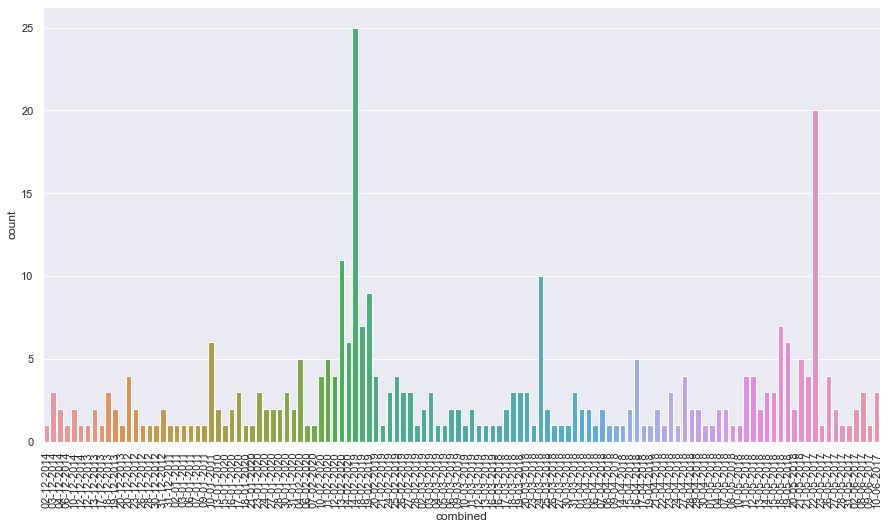

In [66]:
sns.set(rc = {'figure.figsize':(15,8)})
chart = sns.countplot(x='combined', data=nvda_df)
chart.tick_params(axis = 'x', rotation = 90)

Usually there are few stories(1-2) a day. However we also see days with massive spikes.

#### 2.2.4 Preperation for machine learning
In preperation for machine learning we will vectorize the headlines for each news article

First install spacy

In [67]:
#!pip install -U pip setuptools wheel
#!pip install -U 'spacy[cuda113]'
#!pip install -U spacy
#!python -m spacy download en_core_web_lg

We set up the pipeline from spacy we are going to use.

In [68]:
nlp = spacy.load("en_core_web_lg")
pipeline = ["tok2vec", "tagger", "parser", "ner"]

For peformance reasons, we will only create vectors for the NVDA stock, so we first isolate those news stories related to that stock.

In [69]:
nvda_df = news_df.loc[news_df['stock'] == 'NVDA']
nvda_df.reset_index(drop=True, inplace=True)

nvda_df.shape

(3133, 4)

Afterwards we use spacy to pipe each headline from the NVDA set and find the tokens vector. The vector is appended to an empty list.

In [70]:
docs = nvda_df['title']

vec_tokens = []
for token in nlp.pipe(docs):
    vec_tokens.append(token.vector)
    

There are the same number of vectors as there are headlines.

In [71]:
len(vec_tokens)

3133

We add the vectors to the NVDA-dataframe in a vector column.

In [72]:
nvda_df.insert(1, 'vectors', vec_tokens)


Below the result for the dataframe can be seen:

In [73]:
nvda_df

,title,vectors,date,date_time,stock
0,Shares of several technology companies are tra...,"[-0.12309793, 0.13476409, 0.022816218, -0.0729...",2020-06-10 12:37:00-04:00,2020-06-10,NVDA
1,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-10 12:12:00-04:00,2020-06-10,NVDA
2,Morning Market Stats in 5 Minutes,"[-0.08864384, 0.40743163, 0.029238984, 0.09975...",2020-06-10 10:22:00-04:00,2020-06-10,NVDA
3,Shares of several technology companies are tra...,"[-0.10133667, 0.0995245, 0.014292669, -0.04880...",2020-06-09 13:40:00-04:00,2020-06-09,NVDA
4,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-08 12:30:00-04:00,2020-06-08,NVDA
...,...,...,...,...,...
3128,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,"[-0.081583835, -0.040487334, -0.007529506, -0....",2011-03-08 07:59:00-05:00,2011-03-08,NVDA
3129,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT","[-0.1770774, 0.22446373, 0.0959035, -0.1186852...",2011-03-08 07:24:00-05:00,2011-03-08,NVDA
3130,Goldman Sachs Gives Color On Semiconductors (N...,"[-0.16369373, 0.31348112, -0.09664639, -0.0273...",2011-03-07 08:23:00-05:00,2011-03-07,NVDA
3131,Auriga Still Not Sure Where Reality Lies For N...,"[0.038832996, 0.08005888, 0.050424546, -0.2372...",2011-03-07 07:47:00-05:00,2011-03-07,NVDA


Isolating the vector values.

In [74]:
X = nvda_df.iloc[:, 1:2].values
vector_array = np.empty((0, 300), float)
for row in X:
    newrow = row[0].tolist()
    vector_array = np.append(vector_array, np.array([newrow]), axis=0)
vector_array


array([[-0.12309793,  0.13476409,  0.02281622, ..., -0.14143215,
         0.11057411,  0.05572373],
       [-0.02186885,  0.37628338,  0.07851732, ..., -0.14120167,
         0.02061666,  0.08971833],
       [-0.08864384,  0.40743163,  0.02923898, ..., -0.1621495 ,
         0.01944167,  0.10307334],
       ...,
       [-0.16369373,  0.31348112, -0.09664639, ..., -0.10406493,
        -0.09023138,  0.14150955],
       [ 0.038833  ,  0.08005888,  0.05042455, ..., -0.00062433,
        -0.01372555,  0.07308541],
       [-0.26819471,  0.03584077, -0.05473333, ..., -0.17900367,
        -0.01052734,  0.03804933]])

Using kmeans label the titles into two clusters

In [75]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(vector_array)

In [76]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

##### PCA.  
First we find the optimail amount of features that pca recommend.
After that we completely ignore this recommendation and reduce down to 2 dimentions so we can plot the data.

In [77]:
#Whats optimal?
pca_opt = PCA(0.95)
pca_array = pca_opt.fit_transform(vector_array)
pca_opt.n_components_

154

In [78]:
#reduce to two dimentional
pca = PCA(n_components=2)
pca_array = pca.fit_transform(vector_array)
pca_array

array([[-1.17480395,  0.3520381 ],
       [-1.04157592, -0.77812403],
       [-1.05315366, -0.76852939],
       ...,
       [ 1.10604995, -0.1020378 ],
       [-0.16976741,  1.06834428],
       [ 1.33080522,  0.25428273]])

Plotting the two dimentional vectors with the labels from K-Means

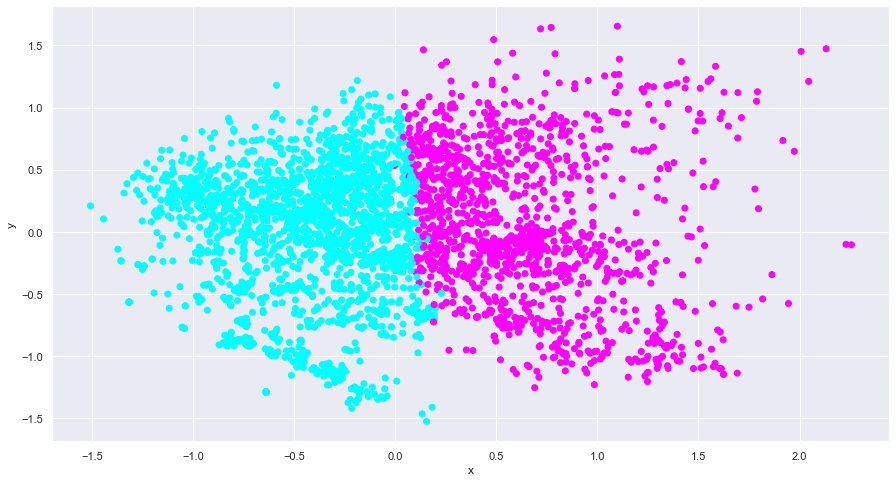

In [79]:
plt.scatter(pca_array[:,0], pca_array[:,1], c=kmeans.labels_, marker="o", picker=True, cmap="cool")
#plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### Note:  
We dont see isolated clusters, in the contrary they are very close together.  
We see a clear division in purple leaning right and cyan leaning left, but they are still very much intertwined.   
However this is probably from PCA reducing down to only two features, and losing alot of meaning in the process.  
Therefore we will continue the machine learning with the full vector.  

### 2.3 Combining dataset
#### considerations:
Usually news stories are clustered on a single day, otherwise there is only 1-2 stories a day, and many days with no stories.
Therefore we will make three different combined dataset to be able to compare them with different ML algorithms in the next section  

1. First combined dataset will be based on the news stories as primary. Meaning if there is a news story then the corrosponding stock data from that day will be added. Meaning we will have multiple rows for the same day.
2. Second combined dataset will be based on the stock data. Meaning we will combine all information from every news article into a single row based on data. We will discard days with no news stories.
3. Third combined dataset will be the same as the second dataset. However we will not discard days with no news stories.

training and splitting will be done individually on each Machine learning section 

#### 2.3.1 First Combined dataset

In [80]:
nvda_df.index=nvda_df['date_time']
nvda_df

,title,vectors,date,date_time,stock
date_time,,,,,
2020-06-10,Shares of several technology companies are tra...,"[-0.12309793, 0.13476409, 0.022816218, -0.0729...",2020-06-10 12:37:00-04:00,2020-06-10,NVDA
2020-06-10,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-10 12:12:00-04:00,2020-06-10,NVDA
2020-06-10,Morning Market Stats in 5 Minutes,"[-0.08864384, 0.40743163, 0.029238984, 0.09975...",2020-06-10 10:22:00-04:00,2020-06-10,NVDA
2020-06-09,Shares of several technology companies are tra...,"[-0.10133667, 0.0995245, 0.014292669, -0.04880...",2020-06-09 13:40:00-04:00,2020-06-09,NVDA
2020-06-08,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-08 12:30:00-04:00,2020-06-08,NVDA
...,...,...,...,...,...
2011-03-08,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,"[-0.081583835, -0.040487334, -0.007529506, -0....",2011-03-08 07:59:00-05:00,2011-03-08,NVDA
2011-03-08,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT","[-0.1770774, 0.22446373, 0.0959035, -0.1186852...",2011-03-08 07:24:00-05:00,2011-03-08,NVDA
2011-03-07,Goldman Sachs Gives Color On Semiconductors (N...,"[-0.16369373, 0.31348112, -0.09664639, -0.0273...",2011-03-07 08:23:00-05:00,2011-03-07,NVDA


In [81]:
sorted_ticker_df.index=sorted_ticker_df['date_time']
sorted_ticker_df

,Date,date_time,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
date_time,,,,,,,,,
2010-08-02,02-08-2010,2010-08-02,2.285000,2.337500,91702000,2.347500,2.295000,2.108841,0
2010-08-03,03-08-2010,2010-08-03,2.217500,2.277500,95544400,2.280000,2.235000,2.053708,0
2010-08-04,04-08-2010,2010-08-04,2.245000,2.255000,85549600,2.337500,2.330000,2.141003,1
2010-08-05,05-08-2010,2010-08-05,2.295000,2.337500,80050400,2.365000,2.360000,2.168569,1
2010-08-06,06-08-2010,2010-08-06,2.330000,2.350000,73990400,2.412500,2.387500,2.193838,1
...,...,...,...,...,...,...,...,...,...
2022-04-19,19-04-2022,2022-04-19,213.139999,217.199997,51278100,223.729996,221.979996,221.979996,1
2022-04-20,20-04-2022,2022-04-20,212.000000,225.169998,46897400,226.699997,214.820007,214.820007,0
2022-04-21,21-04-2022,2022-04-21,200.000000,217.089996,65620900,223.919998,201.830002,201.830002,0


In [82]:
combined_dataset_one=pd.merge(nvda_df,sorted_ticker_df, how='inner', left_index=True, right_index=True)
combined_dataset_one = combined_dataset_one[['stock', 'title', 'vectors','Low','Open','Volume','High','Close','Adjusted Close','Gain or Loss']]
combined_dataset_one

,stock,title,vectors,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
date_time,,,,,,,,,,
2011-03-03,NVDA,Nvidia Goes Negative (NVDA),"[-0.2681947, 0.03584077, -0.054733332, -0.1647...",5.060000,5.307500,159370400,5.337500,5.217500,4.794281,0
2011-03-07,NVDA,Goldman Sachs Gives Color On Semiconductors (N...,"[-0.16369373, 0.31348112, -0.09664639, -0.0273...",4.987500,5.227500,101914000,5.245000,5.117500,4.702394,0
2011-03-07,NVDA,Auriga Still Not Sure Where Reality Lies For N...,"[0.038832996, 0.08005888, 0.050424546, -0.2372...",4.987500,5.227500,101914000,5.245000,5.117500,4.702394,0
2011-03-08,NVDA,"JPM Says ""Our Bearish View on the Company's Ex...","[-0.10606956, 0.14534444, -0.1377427, -0.04398...",4.780000,5.172500,194718400,5.200000,4.887500,4.491050,0
2011-03-08,NVDA,"Benzinga's Top Upgrades (NVDA, ANF, MIPS, WFT)","[-0.04624156, 0.11506958, -0.09996546, -0.1043...",4.780000,5.172500,194718400,5.200000,4.887500,4.491050,0
...,...,...,...,...,...,...,...,...,...,...
2020-06-08,NVDA,Morning Market Stats in 5 Minutes,"[-0.08864384, 0.40743163, 0.029238984, 0.09975...",86.857498,88.772499,38773600,88.897499,88.050003,87.947151,0
2020-06-09,NVDA,Shares of several technology companies are tra...,"[-0.10133667, 0.0995245, 0.014292669, -0.04880...",87.512497,88.000000,46848800,91.097504,90.459999,90.354332,1
2020-06-10,NVDA,Shares of several technology companies are tra...,"[-0.12309793, 0.13476409, 0.022816218, -0.0729...",91.535004,91.677498,63218000,95.000000,93.667503,93.558090,1


In [83]:
item_counts = combined_dataset_one["Gain or Loss"].value_counts()
item_counts

1    1645
0    1412
Name: Gain or Loss, dtype: int64

#### 2.3.2 Second Combined dataset

In [84]:
nvda_df.drop(['date_time'], axis = 1, inplace = True) 
nvda_df

C:\Users\allan\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,title,vectors,date,stock
date_time,,,,
2020-06-10,Shares of several technology companies are tra...,"[-0.12309793, 0.13476409, 0.022816218, -0.0729...",2020-06-10 12:37:00-04:00,NVDA
2020-06-10,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-10 12:12:00-04:00,NVDA
2020-06-10,Morning Market Stats in 5 Minutes,"[-0.08864384, 0.40743163, 0.029238984, 0.09975...",2020-06-10 10:22:00-04:00,NVDA
2020-06-09,Shares of several technology companies are tra...,"[-0.10133667, 0.0995245, 0.014292669, -0.04880...",2020-06-09 13:40:00-04:00,NVDA
2020-06-08,Afternoon Market Stats in 5 Minutes,"[-0.021868845, 0.37628338, 0.07851732, 0.11048...",2020-06-08 12:30:00-04:00,NVDA
...,...,...,...,...
2011-03-08,J.P. Morgan Upgrades NVIDIA Corporation To Neu...,"[-0.081583835, -0.040487334, -0.007529506, -0....",2011-03-08 07:59:00-05:00,NVDA
2011-03-08,"JP Morgan Upgrades NVIDIA To Neutral, $21 PT","[-0.1770774, 0.22446373, 0.0959035, -0.1186852...",2011-03-08 07:24:00-05:00,NVDA
2011-03-07,Goldman Sachs Gives Color On Semiconductors (N...,"[-0.16369373, 0.31348112, -0.09664639, -0.0273...",2011-03-07 08:23:00-05:00,NVDA


In [85]:
nvda_df_temp= nvda_df.groupby('date_time').agg({"stock": "first", "vectors": "mean", })
nvda_df_temp

,stock,vectors
date_time,,
2011-03-03,NVDA,"[-0.2681947, 0.03584077, -0.054733332, -0.1647..."
2011-03-07,NVDA,"[-0.062430367, 0.19677, -0.023110922, -0.13228..."
2011-03-08,NVDA,"[-0.10274309, 0.111097604, -0.03733354, -0.129..."
2011-03-09,NVDA,"[-0.18978651, 0.116145454, 0.06501671, -0.1252..."
2011-03-10,NVDA,"[-0.059756525, 0.16549468, 0.043572336, 0.0780..."
...,...,...
2020-05-31,NVDA,"[-0.056268893, 0.1722622, 0.23736599, 0.022257..."
2020-06-02,NVDA,"[-0.14597087, 0.31131, -0.029093679, -0.119276..."
2020-06-08,NVDA,"[-0.0657532, 0.31575105, 0.0043221912, 0.05740..."


In [86]:
nvda_df_count= nvda_df.groupby('date_time').agg({"vectors": "count", })
nvda_df_count

,vectors
date_time,
2011-03-03,1
2011-03-07,2
2011-03-08,4
2011-03-09,3
2011-03-10,2
...,...
2020-05-31,1
2020-06-02,2
2020-06-08,3


In [87]:
nvda_df_temp['news_count'] = nvda_df_count['vectors']
nvda_df_temp

,stock,vectors,news_count
date_time,,,
2011-03-03,NVDA,"[-0.2681947, 0.03584077, -0.054733332, -0.1647...",1
2011-03-07,NVDA,"[-0.062430367, 0.19677, -0.023110922, -0.13228...",2
2011-03-08,NVDA,"[-0.10274309, 0.111097604, -0.03733354, -0.129...",4
2011-03-09,NVDA,"[-0.18978651, 0.116145454, 0.06501671, -0.1252...",3
2011-03-10,NVDA,"[-0.059756525, 0.16549468, 0.043572336, 0.0780...",2
...,...,...,...
2020-05-31,NVDA,"[-0.056268893, 0.1722622, 0.23736599, 0.022257...",1
2020-06-02,NVDA,"[-0.14597087, 0.31131, -0.029093679, -0.119276...",2
2020-06-08,NVDA,"[-0.0657532, 0.31575105, 0.0043221912, 0.05740...",3


In [88]:
combined_dataset_two=pd.merge(nvda_df_temp,sorted_ticker_df, how='inner', left_index=True, right_index=True)
combined_dataset_two = combined_dataset_two[['stock', 'vectors','news_count','Low','Open','Volume','High','Close','Adjusted Close','Gain or Loss']]
combined_dataset_two

,stock,vectors,news_count,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
date_time,,,,,,,,,,
2011-03-03,NVDA,"[-0.2681947, 0.03584077, -0.054733332, -0.1647...",1,5.060000,5.307500,159370400,5.337500,5.217500,4.794281,0
2011-03-07,NVDA,"[-0.062430367, 0.19677, -0.023110922, -0.13228...",2,4.987500,5.227500,101914000,5.245000,5.117500,4.702394,0
2011-03-08,NVDA,"[-0.10274309, 0.111097604, -0.03733354, -0.129...",4,4.780000,5.172500,194718400,5.200000,4.887500,4.491050,0
2011-03-09,NVDA,"[-0.18978651, 0.116145454, 0.06501671, -0.1252...",3,4.742500,4.872500,131897600,4.920000,4.785000,4.396865,0
2011-03-10,NVDA,"[-0.059756525, 0.16549468, 0.043572336, 0.0780...",2,4.475000,4.675000,172273600,4.710000,4.480000,4.116605,0
...,...,...,...,...,...,...,...,...,...,...
2020-05-28,NVDA,"[-0.16365221, 0.20362715, 0.18621354, -0.02810...",1,83.792503,84.122498,73489600,87.605003,84.870003,84.732201,1
2020-06-02,NVDA,"[-0.14597087, 0.31131, -0.029093679, -0.119276...",2,86.580002,87.962502,39132000,88.372498,88.252502,88.109207,1
2020-06-08,NVDA,"[-0.0657532, 0.31575105, 0.0043221912, 0.05740...",3,86.857498,88.772499,38773600,88.897499,88.050003,87.947151,0


In [89]:
item_counts = combined_dataset_two["Gain or Loss"].value_counts()
item_counts

1    586
0    536
Name: Gain or Loss, dtype: int64

#### 2.3.3 Third Combined dataset

In [90]:
combined_dataset_three=pd.merge(nvda_df_temp,sorted_ticker_df, how='right', left_index=True, right_index=True)
combined_dataset_three = combined_dataset_three[['stock', 'vectors','news_count','Low','Open','Volume','High','Close','Adjusted Close','Gain or Loss']]
combined_dataset_three['stock'] = 'NVDA'
combined_dataset_three.fillna(0,inplace=True)
combined_dataset_three['news_count'] = combined_dataset_three['news_count'].astype(int)
combined_dataset_three

,stock,vectors,news_count,Low,Open,Volume,High,Close,Adjusted Close,Gain or Loss
date_time,,,,,,,,,,
2010-08-02,NVDA,0,0,2.285000,2.337500,91702000,2.347500,2.295000,2.108841,0
2010-08-03,NVDA,0,0,2.217500,2.277500,95544400,2.280000,2.235000,2.053708,0
2010-08-04,NVDA,0,0,2.245000,2.255000,85549600,2.337500,2.330000,2.141003,1
2010-08-05,NVDA,0,0,2.295000,2.337500,80050400,2.365000,2.360000,2.168569,1
2010-08-06,NVDA,0,0,2.330000,2.350000,73990400,2.412500,2.387500,2.193838,1
...,...,...,...,...,...,...,...,...,...,...
2022-04-19,NVDA,0,0,213.139999,217.199997,51278100,223.729996,221.979996,221.979996,1
2022-04-20,NVDA,0,0,212.000000,225.169998,46897400,226.699997,214.820007,214.820007,0
2022-04-21,NVDA,0,0,200.000000,217.089996,65620900,223.919998,201.830002,201.830002,0


In [91]:
item_counts = combined_dataset_three["Gain or Loss"].value_counts()
item_counts

1    1486
0    1468
Name: Gain or Loss, dtype: int64

## 3. Machine Learning

At its heart machine learning is the art of making computers more intelligent without explicitly teaching them how to behave. This is done by identifying patterns in the data. Machine learning derives from artificial intelligence, also known as AI, and is a sub-branch of AI. There are several different types of machine learning and strategies of how to best make use of them. Machine learning involves applying statistics on a dataset to achieve some task. 
We will be using two out of the three subcategories from the machine learning umbrella. The categories consist of supervised learning, unsupervised learning, and reinforcement learning and we will be using supervised and unsupervised learning.

We will be using machine learning to teach an algorithm to predict whether news is able to affect the price of a stock. The dimensions of our dataset will be seven plus a label which is our label.

### 3.1 Dataset preperation for machine learning

Throughout this section we will prepare three datasets which we will train our models upon. These datasets will be split into train, test and validation sets. Thereafter we will train four different algorithms with our datasets and measure their score or accuracy. Afterwards a confusion matrix will be shown to be able to evaluate our algorithms further. We will also show how we have tweaked our algorithms to perform optimally. Lastly the best performing algorithm, which will be evaluated from our validation dataset, will be saved to a file. 

#### 3.1.1 Dataset one Preperation

In [396]:
# Converting the dataset into two arrays
y_dataset_one = combined_dataset_one.filter(['Gain or Loss'], axis=1).values
#x_dataset_one = combined_dataset_one.filter(['stock', 'title', 'vectors', 'Low', 'Open', 'Volume','High','Close','Adjusted Close'], axis=1).values
X_dataset_one = combined_dataset_one.filter(['vectors', 'Low', 'Open', 'Volume','High','Close','Adjusted Close'], axis=1).values

In [397]:
# Do we have the expected columns in our dataset
combined_dataset_one.columns

Index(['stock', 'title', 'vectors', 'Low', 'Open', 'Volume', 'High', 'Close',
       'Adjusted Close', 'Gain or Loss'],
      dtype='object')

In [398]:
# Let us see if we have cleaned our data correct
combined_dataset_one.isnull().sum()

stock             0
title             0
vectors           0
Low               0
Open              0
Volume            0
High              0
Close             0
Adjusted Close    0
Gain or Loss      0
dtype: int64

In [399]:
# Is the size of the important features the same
combined_dataset_one['vectors'].size

3057

In [400]:
# Is the size of the important features the same
combined_dataset_one['Gain or Loss'].size

3057

In [401]:
# How is the distribution of data of our labels
combined_dataset_one['Gain or Loss'].value_counts()

1    1645
0    1412
Name: Gain or Loss, dtype: int64

In [402]:
combined_dataset_one['Gain or Loss'].value_counts(normalize=True) * 100

1    53.810926
0    46.189074
Name: Gain or Loss, dtype: float64

In [403]:
# Let us view the shape of our features
X_dataset_one.shape

(3057, 7)

In [404]:
# Let us view the shape of our label
y_dataset_one.shape

(3057, 1)

In [405]:
# To view the importance of stratification we first split the dateset without
# 
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.3
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_train_dataset_one, X_split_dataset_one, y_train_dataset_one, y_split_dataset_one = train_test_split(X_dataset_one, y_dataset_one, test_size=test_set_size, random_state=random_set_state)

In [406]:
# We now make sure we have a shape we can work with in our model
X_train_dataset_one.shape

(2139, 7)

In [407]:
y_train_dataset_one.shape

(2139, 1)

In [408]:
# For visualization we now view the distribution of the label data
pd.DataFrame(y_train_dataset_one).value_counts(normalize=True) * 100

1    53.529687
0    46.470313
dtype: float64

In [409]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.33
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_test_dataset_one, X_val_dataset_one, y_test_dataset_one, y_val_dataset_one = train_test_split(X_split_dataset_one, y_split_dataset_one, test_size=test_set_size, random_state=random_set_state)

In [410]:
# Let us view the shape of our test set
X_test_dataset_one.shape

(615, 7)

In [411]:
y_test_dataset_one.shape

(615, 1)

In [412]:
# Now we view the distribution of the label data
pd.DataFrame(y_test_dataset_one).value_counts(normalize=True) * 100

1    55.121951
0    44.878049
dtype: float64

Same procedure is now done with the exception of adding stratification when splitting the data

In [413]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.3
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_train_dataset_one, X_split_dataset_one, y_train_dataset_one, y_split_dataset_one = train_test_split(X_dataset_one, y_dataset_one, test_size=test_set_size, random_state=random_set_state, stratify=y_dataset_one)

In [414]:
X_train_dataset_one.shape

(2139, 7)

In [415]:
y_train_dataset_one.shape

(2139, 1)

In [416]:
pd.DataFrame(y_train_dataset_one).value_counts(normalize=True) * 100

1    53.810192
0    46.189808
dtype: float64

In [417]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.33
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_test_dataset_one, X_val_dataset_one, y_test_dataset_one, y_val_dataset_one = train_test_split(X_split_dataset_one, y_split_dataset_one, test_size=test_set_size, random_state=random_set_state, stratify=y_split_dataset_one)

In [418]:
X_test_dataset_one.shape

(615, 7)

In [419]:
y_test_dataset_one.shape

(615, 1)

In [420]:
pd.DataFrame(y_test_dataset_one).value_counts(normalize=True) * 100

1    53.821138
0    46.178862
dtype: float64

Conclusion:  
We can see that our labels have been equally distributed in the train and test set which is what we want since we do not want different distribution between our datasets.

In [421]:
# To verify that the data has been split correctly.
print("Training dataset (70%):", len(X_train_dataset_one))
print("Test dataset (20%):", len(X_test_dataset_one))
print("Validation dataset (10%):", len(X_val_dataset_one))

Training dataset (70%): 2139
Test dataset (20%): 615
Validation dataset (10%): 303


##### 3.1.1.1 Dataset one Vector isolation in numpy


In [424]:
#isolate the vector in a numpy array for machine learning
dataset_one_isolated_vectors = X_train_dataset_one[:, 0:1]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_one_isolated_vectors:
    x_temp = np.array(x.tolist())
    X_new = np.append(X_new, x_temp, axis=0)
    
X_train_dataset_one_np = X_new


#Now we do the same for the test set.
dataset_one_isolated_vectors = X_test_dataset_one[:, 0:1]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_one_isolated_vectors:
    x_temp = np.array(x.tolist())
    X_new = np.append(X_new, x_temp, axis=0)
    
X_test_dataset_one_np = X_new


#### 3.1.2 Dataset two Preperation

In [96]:
# Converting the dataset into two arrays
y_dataset_two = combined_dataset_two.filter(['Gain or Loss'], axis=1).values
x_dataset_two = combined_dataset_two.filter(['stock', 'vectors', 'news_count', 'Low', 'Open', 'Volume','High','Close','Adjusted Close'], axis=1).values

In [97]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.3
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_train_dataset_two, X_split_dataset_two, y_train_dataset_two, y_split_dataset_two = train_test_split(x_dataset_two, y_dataset_two, test_size=test_set_size, random_state=random_set_state, stratify=y_dataset_two)

In [98]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.33
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_test_dataset_two, X_val_dataset_two, y_test_dataset_two, y_val_dataset_two = train_test_split(X_split_dataset_two, y_split_dataset_two, test_size=test_set_size, random_state=random_set_state, stratify=y_split_dataset_two)

In [99]:
# To verify that the data has been split correctly.
print("Training dataset (70%):", len(X_train_dataset_two))
print("Test dataset (20%):", len(X_test_dataset_two))
print("Validation dataset (10%):", len(X_val_dataset_two))

Training dataset (70%): 785
Test dataset (20%): 225
Validation dataset (10%): 112


##### 3.1.2.1 Dataset two Vector isolation in numpy

In [469]:
#isolate the vector in a numpy array for machine learning
dataset_two_isolated_vectors = X_train_dataset_two[:, 1:2]
dataset_two_isolated_newsCount = X_train_dataset_two[:, 2:3]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_two_isolated_vectors:
    x_temp = np.array(x.tolist())
    X_new = np.append(X_new, x_temp, axis=0)
    
X_new = np.append(X_new, dataset_two_isolated_newsCount, axis=1)    
X_train_dataset_two_np = X_new


#Now we do the same for the test set.
dataset_two_isolated_vectors = X_test_dataset_two[:, 1:2]
dataset_two_isolated_newsCount = X_test_dataset_two[:, 2:3]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_two_isolated_vectors:
    x_temp = np.array(x.tolist())
    X_new = np.append(X_new, x_temp, axis=0)
    
X_new = np.append(X_new, dataset_two_isolated_newsCount, axis=1)    
X_test_dataset_two_np = X_new

#### 3.1.3 Dataset three Preperation

In [100]:
# Converting the dataset into two arrays
y_dataset_three = combined_dataset_three.filter(['Gain or Loss'], axis=1).values
x_dataset_three = combined_dataset_three.filter(['stock', 'vectors', 'news_count', 'Low', 'Open', 'Volume','High','Close','Adjusted Close'], axis=1).values

In [101]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.3
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_train_dataset_three, X_split_dataset_three, y_train_dataset_three, y_split_dataset_three = train_test_split(x_dataset_three, y_dataset_three, test_size=test_set_size, random_state=random_set_state, stratify=y_dataset_three)

In [102]:
# Our test size will be 20% of the dataset. validation will be 10% and training will be 70%
test_set_size = 0.33
# Random_state=3 has been added as a tool to always be able to reproduce the same split 
random_set_state = 3

X_test_dataset_three, X_val_dataset_three, y_test_dataset_three, y_val_dataset_three = train_test_split(X_split_dataset_three, y_split_dataset_three, test_size=test_set_size, random_state=random_set_state, stratify=y_split_dataset_three)

In [103]:
# To verify that the data has been split correctly.
print("Training dataset (70%):", len(X_train_dataset_three))
print("Test dataset (20%):", len(X_test_dataset_three))
print("Validation dataset (10%):", len(X_val_dataset_three))

Training dataset (70%): 2067
Test dataset (20%): 594
Validation dataset (10%): 293


##### 3.1.3.1 Dataset three Vector isolation in numpy

In [468]:
#isolate the vector in a numpy array for machine learning
dataset_three_isolated_vectors = X_train_dataset_three[:, 1:2]
dataset_three_isolated_newsCount = X_train_dataset_three[:, 2:3]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_three_isolated_vectors:
    if x != 0:
        x_temp = np.array(x.tolist())
        X_new = np.append(X_new, x_temp, axis=0)
    else:
        X_new = np.append(X_new, np.array(np.zeros((1,300))), axis=0)
        
            
X_new = np.append(X_new, dataset_three_isolated_newsCount, axis=1)    
X_train_dataset_three_np = X_new

#Now we do the same for the test set.
dataset_three_isolated_vectors = X_test_dataset_three[:, 1:2]
dataset_three_isolated_newsCount = X_test_dataset_three[:, 2:3]

n = 300
X_new = np.empty(shape=[0, n])
for x in dataset_three_isolated_vectors:
    if x != 0:
        x_temp = np.array(x.tolist())
        X_new = np.append(X_new, x_temp, axis=0)
    else:
        X_new = np.append(X_new, np.array(np.zeros((1,300))), axis=0)
    
X_new = np.append(X_new, dataset_three_isolated_newsCount, axis=1)    
X_test_dataset_three_np = X_new

C:\Users\allan\AppData\Local\Temp/ipykernel_12360/2059349693.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if x != 0:
C:\Users\allan\AppData\Local\Temp/ipykernel_12360/2059349693.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if x != 0:


### 3.2 K-means

#### 3.2.1 Theory

#### 3.2.2 Machine Learning Dataset one


##### 3.2.2.1 Training the Model

In [ ]:
# Validating the Model with K-Means
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,50)
for k in K:
    model = KMeans(n_clusters=k).fit(X_test_dataset_one_np)
    model.fit(X_test_dataset_one_np)
    distortions.append(sum(np.min(cdist(X_test_dataset_one_np, model.cluster_centers_, 'euclidean'), axis=1)) / X_test_dataset_one_np.shape[0]) 
print("Distortion: ", distortions)

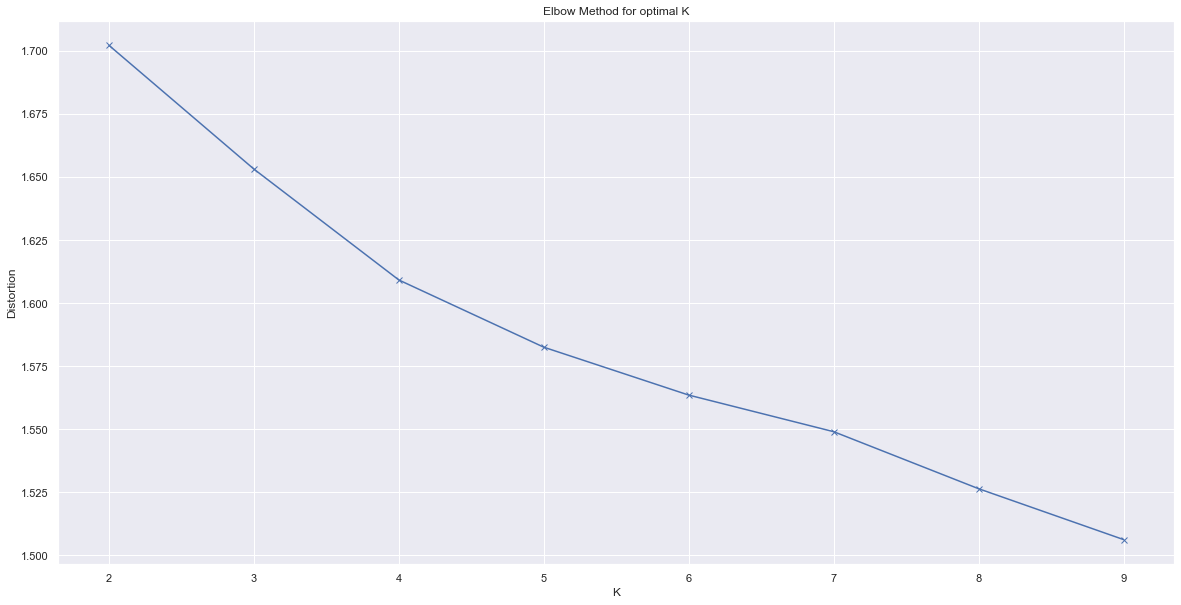

In [633]:
# Plot the elbow
plt.title('Elbow Method for optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [628]:
kmeans_one = KMeans(n_clusters=2, random_state=0)
kmeans_one.fit(X_train_dataset_one_np)

KMeans(n_clusters=2, random_state=0)

##### 3.2.2.2 Evaluating the Model


In [629]:
#We look at the score for this model
kmeans_one.score(X_test_dataset_one_np)

-1907.6185821898969

##### 3.2.2.3 Estimating the Errors in Prediction

In [625]:
predictions = kmeans_one.predict(X_test_dataset_one_np)

In [626]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_one, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_one, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_one, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_one, predictions)))

Accuracy score:  0.5219512195121951
Precision score:  0.5530085959885387
Recall score:  0.5830815709969789
F1 score:  0.5676470588235294


### 3.3 K-Nearest Neighbors

Through out this section we will try to fit our datasets with the supervised learning method called K-Nearest Neighbors, which is used for classification. 

#### 3.3.1 Theory
K-Nearest Neighbors is a machine learning algorithm which relies on labeled input data to learn and produce an appropriate output when given new unlabeled data. As it is with supervised machine learning we have to supervise the training of our algorithm. In our case we want to make the algorithm learn whether the stock price ("Gain or Loss") goes up (1) or down (0). This is our classification problem and the output is in form of a discrete value 1 or 0. It is standard practice to represent the output (label) of a classification algorithm as an integer and only for representational purpose. Therefor there should not be performed any mathematical operations on this.

K-Nearest Neighbors assumes that similar things exist in close proximity. This is done by calculating the distance between points and can be done in form of a straight line which is called the Euclidean distance. K is a value we have to input ourselves and tells the algorithm how many neighbors the algorithm should look at (measure the distance to) and from there decide what label fits the data point. If we increase the number of k the predictions become more stable, but this is only up to a certain point. Eventually there will be an increase in the number of errors and then we know we have chosen a too high k value. To be sure we have a tiebreaker it is a good idea to make k an odd number to be able to perform a majority vote.


Advantages with this algorithm is that it is simple and easy to implement. There is no need to tune several parameters or build a model. Lastly this algorithm can be used for classification and regression which makes it versatile.
A disadvantage with this algorithm is that it gets significantly slower as the number of predictors (variables/features) increase as well as the data size.
A use case for chosing k-nearest neighbor could be to recommend a movie. 
Example: "Given our movie dataset, what are the 5 most similar movies to a movie query?". Which also could be translated to our dataset in form of associating headline news with specific sectors in the stock market.

#### 3.3.2 Machine Learning Dataset one
Let us begin with training our first dataset and see how accurate K-nearest neighbor can be used to predict our label.

##### 3.3.2.1 Training the Model

In [610]:
# Setting K for our model.
k = 13
# Create an instance of the KNN classification model.
knn_model_one = KNeighborsClassifier(n_neighbors=k)
knn_model_one

KNeighborsClassifier(n_neighbors=13)

In [611]:
# Fit the model to our train data
%time knn_model_one.fit(X_train_dataset_one_np, y_train_dataset_one.ravel())
#%time knn_model.fit(X_train_dataset_one, y_train_dataset_one)


Wall time: 2 ms


KNeighborsClassifier(n_neighbors=13)

##### 3.3.2.2 Evaluating the Model

In [612]:
#We look at the score for this model
knn_model_one.score(X_test_dataset_one_np, y_test_dataset_one)

0.5609756097560976

##### 3.3.2.3 Estimating the Errors in Prediction

In [535]:
predictions = knn_model_one.predict(X_test_dataset_one_np)

In [536]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_one, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_one, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_one, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_one, predictions)))

Accuracy score:  0.551219512195122
Precision score:  0.5787965616045845
Recall score:  0.6102719033232629
F1 score:  0.5941176470588235


##### 3.3.2.4 Visualizing data (?)

##### 3.3.2.5 Validating with validation set (?)

#### 3.3.3 Machine Learning Dataset two



##### 3.3.3.1 Training the Model

In [537]:
# Setting K for our model.
k = 9
# Create an instance of the KNN classification model.
knn_model_two = KNeighborsClassifier(n_neighbors=k)
knn_model_two

KNeighborsClassifier(n_neighbors=9)

In [538]:
# Fit the model to our train data
%time knn_model_two.fit(X_train_dataset_two_np, y_train_dataset_two.ravel())
#%time knn_model.fit(X_train_dataset_one, y_train_dataset_one)


Wall time: 6 ms


KNeighborsClassifier(n_neighbors=9)

##### 3.3.3.2 Evaluating the Model

In [539]:
#We look at the score for this model
knn_model_two.score(X_test_dataset_two_np, y_test_dataset_two)

0.5333333333333333

##### 3.3.3.3 Estimating the Errors in Prediction

In [540]:
predictions = knn_model_two.predict(X_test_dataset_two_np)

In [541]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_two, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_two, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_two, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_two, predictions)))

Accuracy score:  0.5333333333333333
Precision score:  0.549618320610687
Recall score:  0.6101694915254238
F1 score:  0.5783132530120482


##### 3.3.3.4 Visualizing data (?)

##### 3.3.3.5 Validating with validation set (?)

#### 3.3.4 Machine Learning Dataset three


##### 3.3.4.1 Training the Model

In [542]:
# Setting K for our model.
k = 9
# Create an instance of the KNN classification model.
knn_model_three = KNeighborsClassifier(n_neighbors=k)
knn_model_three

KNeighborsClassifier(n_neighbors=9)

In [543]:
# Fit the model to our train data
%time knn_model_three.fit(X_train_dataset_three_np, y_train_dataset_three.ravel())
#%time knn_model.fit(X_train_dataset_one, y_train_dataset_one)


Wall time: 10 ms


KNeighborsClassifier(n_neighbors=9)

##### 3.3.4.2 Evaluating the Model

In [544]:
#We look at the score for this model
knn_model_three.score(X_test_dataset_three_np, y_test_dataset_three)

0.5084175084175084

##### 3.3.4.3 Estimating the Errors in Prediction

In [545]:
predictions = knn_model_three.predict(X_test_dataset_three_np)

In [546]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_three, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_three, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_three, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_three, predictions)))

Accuracy score:  0.5084175084175084
Precision score:  0.5244755244755245
Recall score:  0.2508361204013378
F1 score:  0.3393665158371041


##### 3.3.4.4 Visualizing data (?)

##### 3.3.4.5 Validating with validation set (?)

#### 3.3.5 Summary

Jamming

##### 3.3.4.5 Validating with validation set (?)

### 3.4 Gaussian Naive Bayes

#### 3.4.1 Theory

Naive Bayes is an easy classification method and it has proven to perform well when dealing with a large amount of data, which in our case could be beneficial since we are working with the stock market and the news flow attached to this. Naive Bayes has shown to especially be effective when having to perform as a spam filter, text classifier, and recommender system. Naive Bayes makes predictions about labels using the Bayes theory of probability which in terms makes the model a probabilistic classification model. Bayes theorem is a formula which uses conditional probability of an event, A happening given another event B has previously happened.  
The formula:   
P(A|B) = P(B|A) * P(A) / P(B)   
P(A|B) = the probability of event A happening given event B has happened.   
P(B|A) = the probability of event B happening given event A has happened.   
P(A) = the probability of event A.   
P(B) = the probability of event B.   

As a classifier Naive Bayes has the following characteristics:
- Naive Bayes makes the assumption that the predictors contribute equally and independently to predict the output (label). 
- Though the model makes an assumption about the predictors being independent of each other it is not what would resemble circumstances in the real world. However, the outcome is satisfactory in the majority of cases and this also makes the model computational fast. If the model did not make this assumption it would take a long time to compute which would not be beneficial in something like a spam filter, where there is a need to classify spam rather fast, so the users do not have to wait to receive their emails. 
- Naive Bayes is often used to categorize text because the dimensionality of the data often is large.

#### 3.4.2 Machine Learning Dataset one


##### 3.4.2.1 Training the Model

In [547]:
gnb_one = GaussianNB()
gnb_one.fit(X_train_dataset_one_np, y_train_dataset_one.ravel())

GaussianNB()

##### 3.4.2.2 Evaluating the Model


In [548]:
#We look at the score for this model
gnb_one.score(X_test_dataset_one_np, y_test_dataset_one)

0.5739837398373984

##### 3.4.2.3 Estimating the Errors in Prediction

In [549]:
predictions = gnb_one.predict(X_test_dataset_one_np)

In [550]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_one, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_one, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_one, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_one, predictions)))

Accuracy score:  0.5739837398373984
Precision score:  0.6210526315789474
Recall score:  0.5347432024169184
F1 score:  0.5746753246753247


##### 3.4.2.4 Visualizing data (?)

##### 3.4.2.5 Validating with validation set (?)

#### 3.4.3 Machine Learning Dataset two

##### 3.4.3.1 Training the Model

In [551]:
gnb_two = GaussianNB()
gnb_two.fit(X_train_dataset_two_np, y_train_dataset_two.ravel())

GaussianNB()

##### 3.4.3.2 Evaluating the Model


In [552]:
#We look at the score for this model
gnb_two.score(X_test_dataset_two_np, y_test_dataset_two)

0.4888888888888889

##### 3.4.3.3 Estimating the Errors in Prediction

In [553]:
predictions = gnb_two.predict(X_test_dataset_two_np)

In [554]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_two, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_two, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_two, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_two, predictions)))

Accuracy score:  0.4888888888888889
Precision score:  0.5114503816793893
Recall score:  0.5677966101694916
F1 score:  0.5381526104417672


##### 3.4.3.4 Visualizing data (?)

##### 3.4.3.5 Validating with validation set (?)

#### 3.4.4 Machine Learning Dataset three

##### 3.4.4.1 Training the Model

In [555]:
gnb_three = GaussianNB()
gnb_three.fit(X_train_dataset_three_np, y_train_dataset_three.ravel())

GaussianNB()

##### 3.4.4.2 Evaluating the Model


In [556]:
#We look at the score for this model
gnb_three.score(X_test_dataset_three_np, y_test_dataset_three)

0.5084175084175084

##### 3.4.4.3 Estimating the Errors in Prediction

In [557]:
predictions = gnb_three.predict(X_test_dataset_three_np)

In [558]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_three, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_three, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_three, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_three, predictions)))

Accuracy score:  0.5084175084175084
Precision score:  0.515695067264574
Recall score:  0.38461538461538464
F1 score:  0.44061302681992337


##### 3.4.4.4 Visualizing data (?)

##### 3.4.4.5 Validating with validation set (?)

#### 3.4.5 Summary

### 3.5 Decision Tree

#### 3.5.1 Theory

Our two above shown algorithms are part of the supervised learning method called classification which the following algorithm decision tree also is a part of. Imagine having a set of conditions on a set of nodes that run from top to bottom. These nodes could contain simple question with conditions (yes/no), which would lead to another node. At the end of a branch when it does not split anymore is where a decision would be found. The decision is what will be classified as a label. In the simplest form this is how a decision tree works and this methodology is known as learning decision tree and is called a classification tree. This form of algorithm "grows" a tree in the background deciding on which features to pick and what conditions to use for branching (splitting) and finally knowing when to stop. In a procedure like this all features are considered, and different split points are tried and tested with a cost function. A split is evaluated and chosen by the lowest cost which is also the best cost. Just like K-Nearest Neighbors a decision tree can be used for classification and regression which makes it versatile, but the preferred use is for solving classification problems. In short, a decision tree contains two kinds of nodes, a decision node and a leaf node. From a decision node there will be made a decision which can contain several branches. A leaf node derives from the decision node and is the output from the decision that has been made along the way. Furthermore, leaf nodes do not contain further branches. Reasons to choose the decision tree algorithm could be that the algorithm usually mimics human thinking while making a decision which can make the algorithm easy to understand. Furthermore, the logic behind a decision tree can be shown in a tree-like structure which again contributes to an easy to understand understanding.

#### 3.5.2 Machine Learning Dataset one


##### 3.5.2.1 Training the Model

In [576]:
dtc_one = DecisionTreeClassifier()
dtc_one.fit(X_train_dataset_one_np, y_train_dataset_one.ravel())

DecisionTreeClassifier()

##### 3.5.2.2 Evaluating the Model


In [577]:
dtc_one.score(X_test_dataset_one_np, y_test_dataset_one)

0.5235772357723577

##### 3.5.2.3 Estimating the Errors in Prediction

In [561]:
predictions = dtc_one.predict(X_test_dataset_one_np)

In [562]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_one, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_one, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_one, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_one, predictions)))

Accuracy score:  0.510569105691057
Precision score:  0.5441176470588235
Recall score:  0.5589123867069486
F1 score:  0.5514157973174367


##### 3.5.2.4 Visualizing data (?)

##### 3.5.2.5 Validating with validation set (?)

#### 3.5.3 Machine Learning Dataset two


##### 3.5.3.1 Training the Model

In [578]:
dtc_two = DecisionTreeClassifier()
dtc_two.fit(X_train_dataset_two_np, y_train_dataset_two.ravel())

DecisionTreeClassifier()

##### 3.5.3.2 Evaluating the Model


In [579]:
dtc_two.score(X_test_dataset_two_np, y_test_dataset_two)

0.4577777777777778

##### 3.5.3.3 Estimating the Errors in Prediction

In [565]:
predictions = dtc_two.predict(X_test_dataset_two_np)

In [566]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_two, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_two, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_two, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_two, predictions)))

Accuracy score:  0.4444444444444444
Precision score:  0.4672897196261682
Recall score:  0.423728813559322
F1 score:  0.4444444444444444


##### 3.5.3.4 Visualizing data (?)

##### 3.5.3.5 Validating with validation set (?)

#### 3.5.4 Machine Learning Dataset three


##### 3.5.4.1 Training the Model

In [567]:
dtc_three = DecisionTreeClassifier()
dtc_three.fit(X_train_dataset_three_np, y_train_dataset_three.ravel())

DecisionTreeClassifier()

##### 3.5.4.2 Evaluating the Model


In [568]:
dtc_three.score(X_test_dataset_three_np, y_test_dataset_three)

0.5033670033670034

##### 3.5.4.3 Estimating the Errors in Prediction

In [569]:
predictions = dtc_three.predict(X_test_dataset_three_np)

In [570]:
# Validate the accuracy of the predictions
print('Accuracy score: ', format(accuracy_score(y_test_dataset_three, predictions)))
print('Precision score: ', format(precision_score(y_test_dataset_three, predictions)))
print('Recall score: ', format(recall_score(y_test_dataset_three, predictions)))
print('F1 score: ', format(f1_score(y_test_dataset_three, predictions)))

Accuracy score:  0.5033670033670034
Precision score:  0.515625
Recall score:  0.22073578595317725
F1 score:  0.3091334894613583


##### 3.5.4.4 Visualizing data (?)

##### 3.5.4.5 Validating with validation set (?)

#### 3.5.5 Summary


### 3.6 Validation And Summary

Since Gaussian naive bayes that was trained on dataset one, was the best performing candidate we wil save that as our model

In [615]:
joblib.dump(gnb_one, '../model/model.pkl')
#msmodel = joblib.load('../deploy/msmodel.pkl')

['model.pkl']

## 4. Visualization

## 5. Project solution